In [1726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1727]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\peakflo.csv")

In [1728]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [1729]:
df.head()

id  total_amount  amount_due                      issue_date  \
0   1       1720329         0.0  2021-11-01 00:00:00.000000 UTC   
1   2       1560727         0.0  2021-11-01 00:00:00.000000 UTC   
2   3        149600         0.0  2021-11-01 00:00:00.000000 UTC   
3   4        149600         0.0  2021-11-01 00:00:00.000000 UTC   
4   5        149600         0.0  2021-11-01 00:00:00.000000 UTC   

                         due_date                    paid_on_date  \
0  2021-12-31 00:00:00.000000 UTC  2022-08-22 00:00:00.000000 UTC   
1  2021-12-01 00:00:00.000000 UTC  2021-12-04 00:00:00.000000 UTC   
2  2022-02-14 00:00:00.000000 UTC  2022-02-22 00:00:00.000000 UTC   
3  2022-02-14 00:00:00.000000 UTC  2022-02-22 00:00:00.000000 UTC   
4  2022-02-14 00:00:00.000000 UTC  2022-02-22 00:00:00.000000 UTC   

               payer_id  
0  pKey9MQ59wyF6GhjWM5p  
1  Ed9wuAC3RlOfWkENchdD  
2  bPBZIvFiIE1ZbZjvuYm7  
3  bPBZIvFiIE1ZbZjvuYm7  
4  bPBZIvFiIE1ZbZjvuYm7

In [1730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17692 entries, 0 to 17691
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            17692 non-null  int64  
 1   total_amount  17692 non-null  int64  
 2   amount_due    17692 non-null  float64
 3   issue_date    17692 non-null  object 
 4   due_date      17692 non-null  object 
 5   paid_on_date  12929 non-null  object 
 6   payer_id      17692 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 967.7+ KB


In [1731]:
from datetime import datetime

df['issue_date'] = pd.to_datetime(df['issue_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])


df['paid_on_date'] = pd.to_datetime(df['paid_on_date']).dt.date
df['due_date'] = pd.to_datetime(df['due_date']).dt.date
df['issue_date'] = pd.to_datetime(df['issue_date']).dt.date

In [1732]:
df.head()

id  total_amount  amount_due  issue_date    due_date paid_on_date  \
0   1       1720329         0.0  2021-11-01  2021-12-31   2022-08-22   
1   2       1560727         0.0  2021-11-01  2021-12-01   2021-12-04   
2   3        149600         0.0  2021-11-01  2022-02-14   2022-02-22   
3   4        149600         0.0  2021-11-01  2022-02-14   2022-02-22   
4   5        149600         0.0  2021-11-01  2022-02-14   2022-02-22   

               payer_id  
0  pKey9MQ59wyF6GhjWM5p  
1  Ed9wuAC3RlOfWkENchdD  
2  bPBZIvFiIE1ZbZjvuYm7  
3  bPBZIvFiIE1ZbZjvuYm7  
4  bPBZIvFiIE1ZbZjvuYm7

In [1733]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id'],
      dtype='object')

In [1734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17692 entries, 0 to 17691
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            17692 non-null  int64  
 1   total_amount  17692 non-null  int64  
 2   amount_due    17692 non-null  float64
 3   issue_date    17692 non-null  object 
 4   due_date      17692 non-null  object 
 5   paid_on_date  12929 non-null  object 
 6   payer_id      17692 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 967.7+ KB


In [1735]:
df.dropna(inplace=True)

In [1736]:
import pandas as pd

# Assuming df is your DataFrame
# Convert date columns to datetime objects
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])

# Create a new column 'amount' and calculate the sum of 'total_amount' for each unique date
df['amount'] = df.groupby(df['paid_on_date'].dt.date)['total_amount'].transform('sum')

# If you want to fill NaN values with 0 in the 'amount' column

# Display the updated DataFrame
df.head()

id  total_amount  amount_due issue_date   due_date paid_on_date  \
0   1       1720329         0.0 2021-11-01 2021-12-31   2022-08-22   
1   2       1560727         0.0 2021-11-01 2021-12-01   2021-12-04   
2   3        149600         0.0 2021-11-01 2022-02-14   2022-02-22   
3   4        149600         0.0 2021-11-01 2022-02-14   2022-02-22   
4   5        149600         0.0 2021-11-01 2022-02-14   2022-02-22   

               payer_id    amount  
0  pKey9MQ59wyF6GhjWM5p  20390909  
1  Ed9wuAC3RlOfWkENchdD   1560727  
2  bPBZIvFiIE1ZbZjvuYm7  15333392  
3  bPBZIvFiIE1ZbZjvuYm7  15333392  
4  bPBZIvFiIE1ZbZjvuYm7  15333392

In [1737]:
df['paid_on_date'].nunique()

305

In [1738]:
new_df = pd.DataFrame({
    'paid_on_date': df['paid_on_date'].dt.date.unique(),
    'amount': df.groupby(df['paid_on_date'].dt.date)['amount'].max().reset_index(drop=True)
})

In [1739]:
new_df.head()

paid_on_date   amount
0   2022-08-22   178735
1   2021-12-04   538211
2   2022-02-22   221000
3   2022-01-15    77000
4   2022-01-18  7625661

In [1740]:
new_df=new_df.sort_values(by='paid_on_date')

In [1741]:
new_df.set_index('paid_on_date', inplace=True)

In [1742]:
new_df.head()

amount
paid_on_date          
2021-11-23      111095
2021-11-24    25258997
2021-11-25      709552
2021-11-26      110585
2021-12-01    11962203

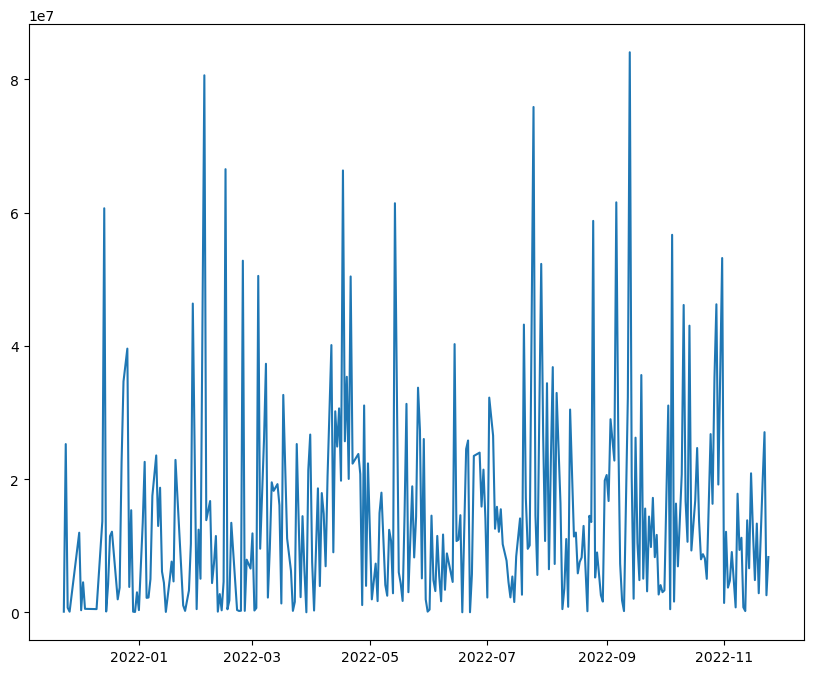

In [1743]:
plt.plot(new_df)

In [1744]:
new_df.index

Index([2021-11-23, 2021-11-24, 2021-11-25, 2021-11-26, 2021-12-01, 2021-12-02,
       2021-12-03, 2021-12-04, 2021-12-10, 2021-12-13,
       ...
       2022-11-14, 2022-11-15, 2022-11-16, 2022-11-17, 2022-11-18, 2022-11-19,
       2022-11-21, 2022-11-22, 2022-11-23, 2022-11-24],
      dtype='object', name='paid_on_date', length=305)

In [1745]:
new_df.index = pd.to_datetime(new_df.index)

In [1746]:
new_df.index

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-10', '2021-12-13',
               ...
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-19', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-24'],
              dtype='datetime64[ns]', name='paid_on_date', length=305, freq=None)

In [1747]:
pd.date_range(start='2021-11-23',periods=len(new_df.index),freq='B')

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23'],
              dtype='datetime64[ns]', length=305, freq='B')

In [1748]:
df1=new_df.copy()

In [1749]:
def plot(df):
    plt.figure(figsize=(20, 10))
    plt.plot(df)
    plt.title('Monthly Revenue Amount Trend')
    plt.xlabel('Paid On Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45, ha='right')
    
    plt.xlim(df.index.min(), df.index.max())
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

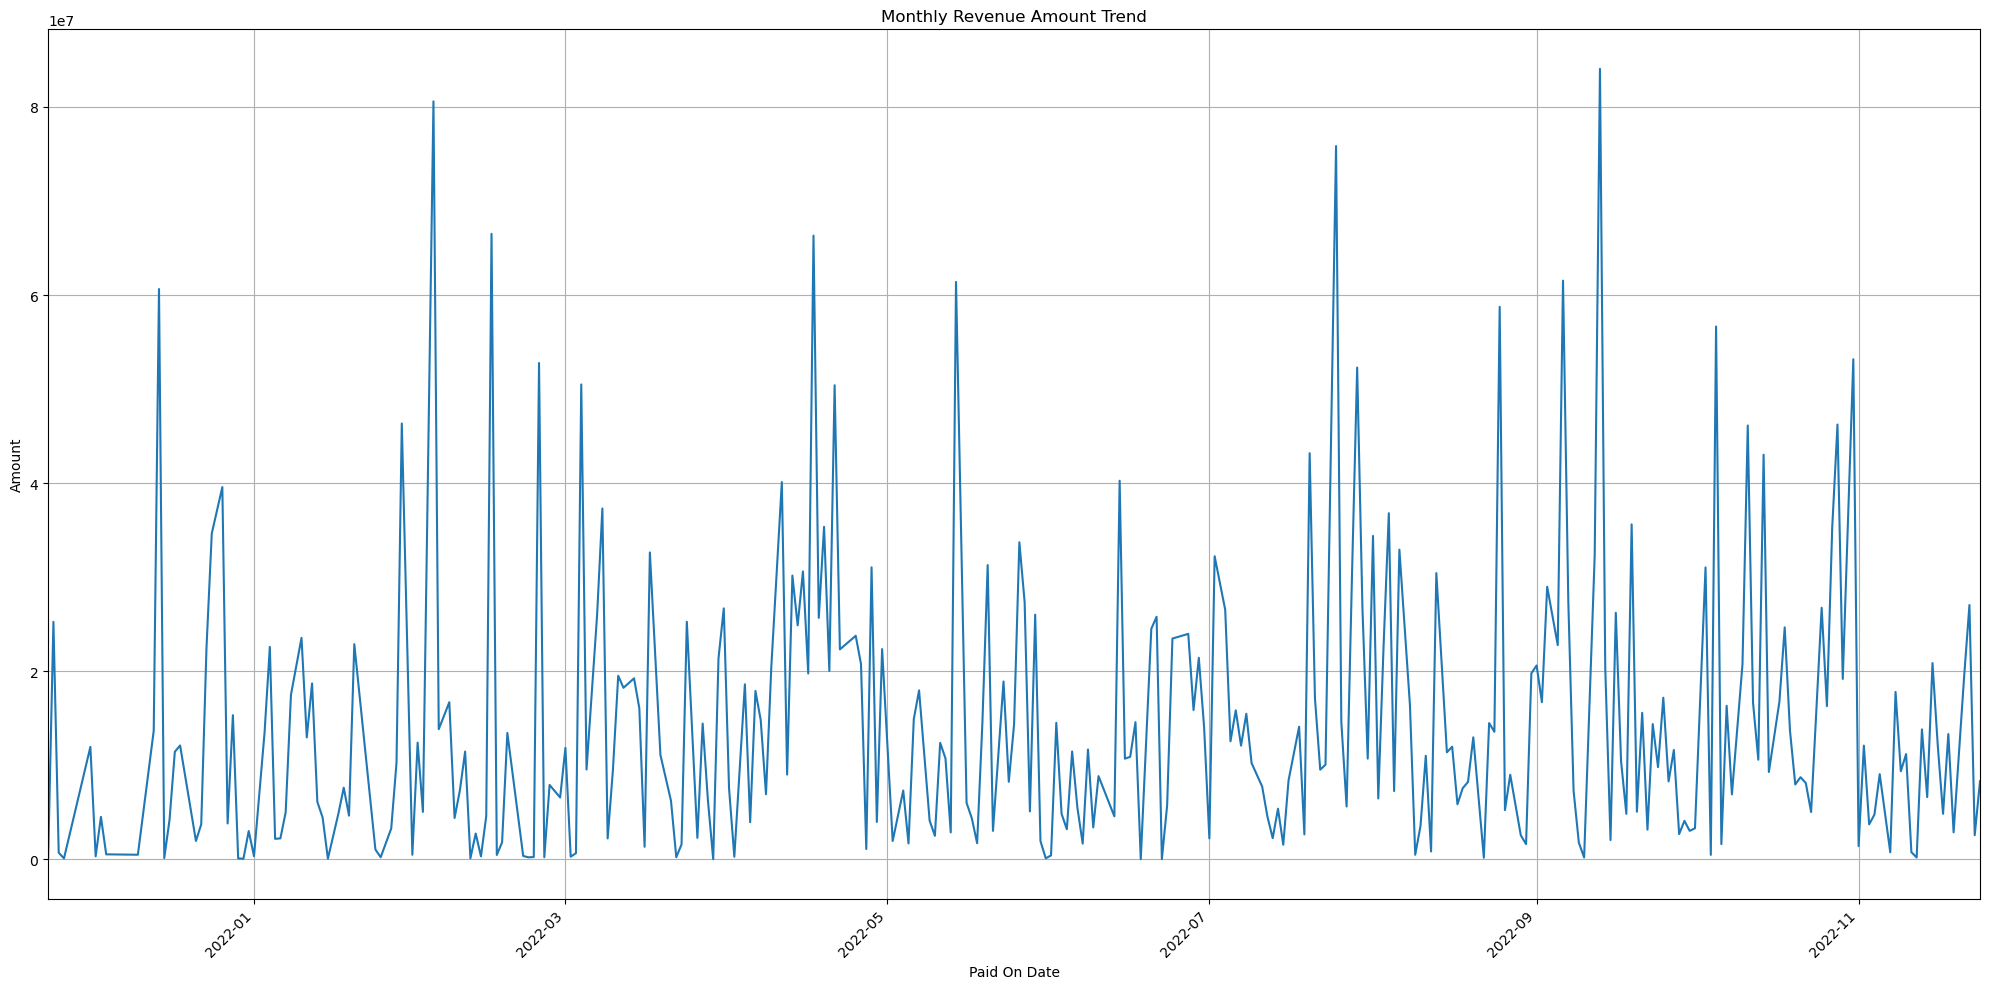

In [1750]:
plot(new_df)

In [1751]:
new_df['amount'].rolling(window=3).mean()

paid_on_date
2021-11-23          NaN
2021-11-24          NaN
2021-11-25    8693214.7
2021-11-26    8693044.7
2021-12-01    4260780.0
                ...    
2022-11-19    7020133.7
2022-11-21   11899656.3
2022-11-22   16471545.7
2022-11-23   16371286.7
2022-11-24   12645044.3
Name: amount, Length: 305, dtype: float64

In [1752]:
new_df['ma_rolling_3']=new_df['amount'].rolling(window=3).mean().shift(1).fillna(0)

In [1753]:
new_df

amount  ma_rolling_3
paid_on_date                        
2021-11-23      111095           0.0
2021-11-24    25258997           0.0
2021-11-25      709552           0.0
2021-11-26      110585     8693214.7
2021-12-01    11962203     8693044.7
...                ...           ...
2022-11-19     2879833    10095194.3
2022-11-21    19488085     7020133.7
2022-11-22    27046719    11899656.3
2022-11-23     2579056    16471545.7
2022-11-24     8309358    16371286.7

[305 rows x 2 columns]

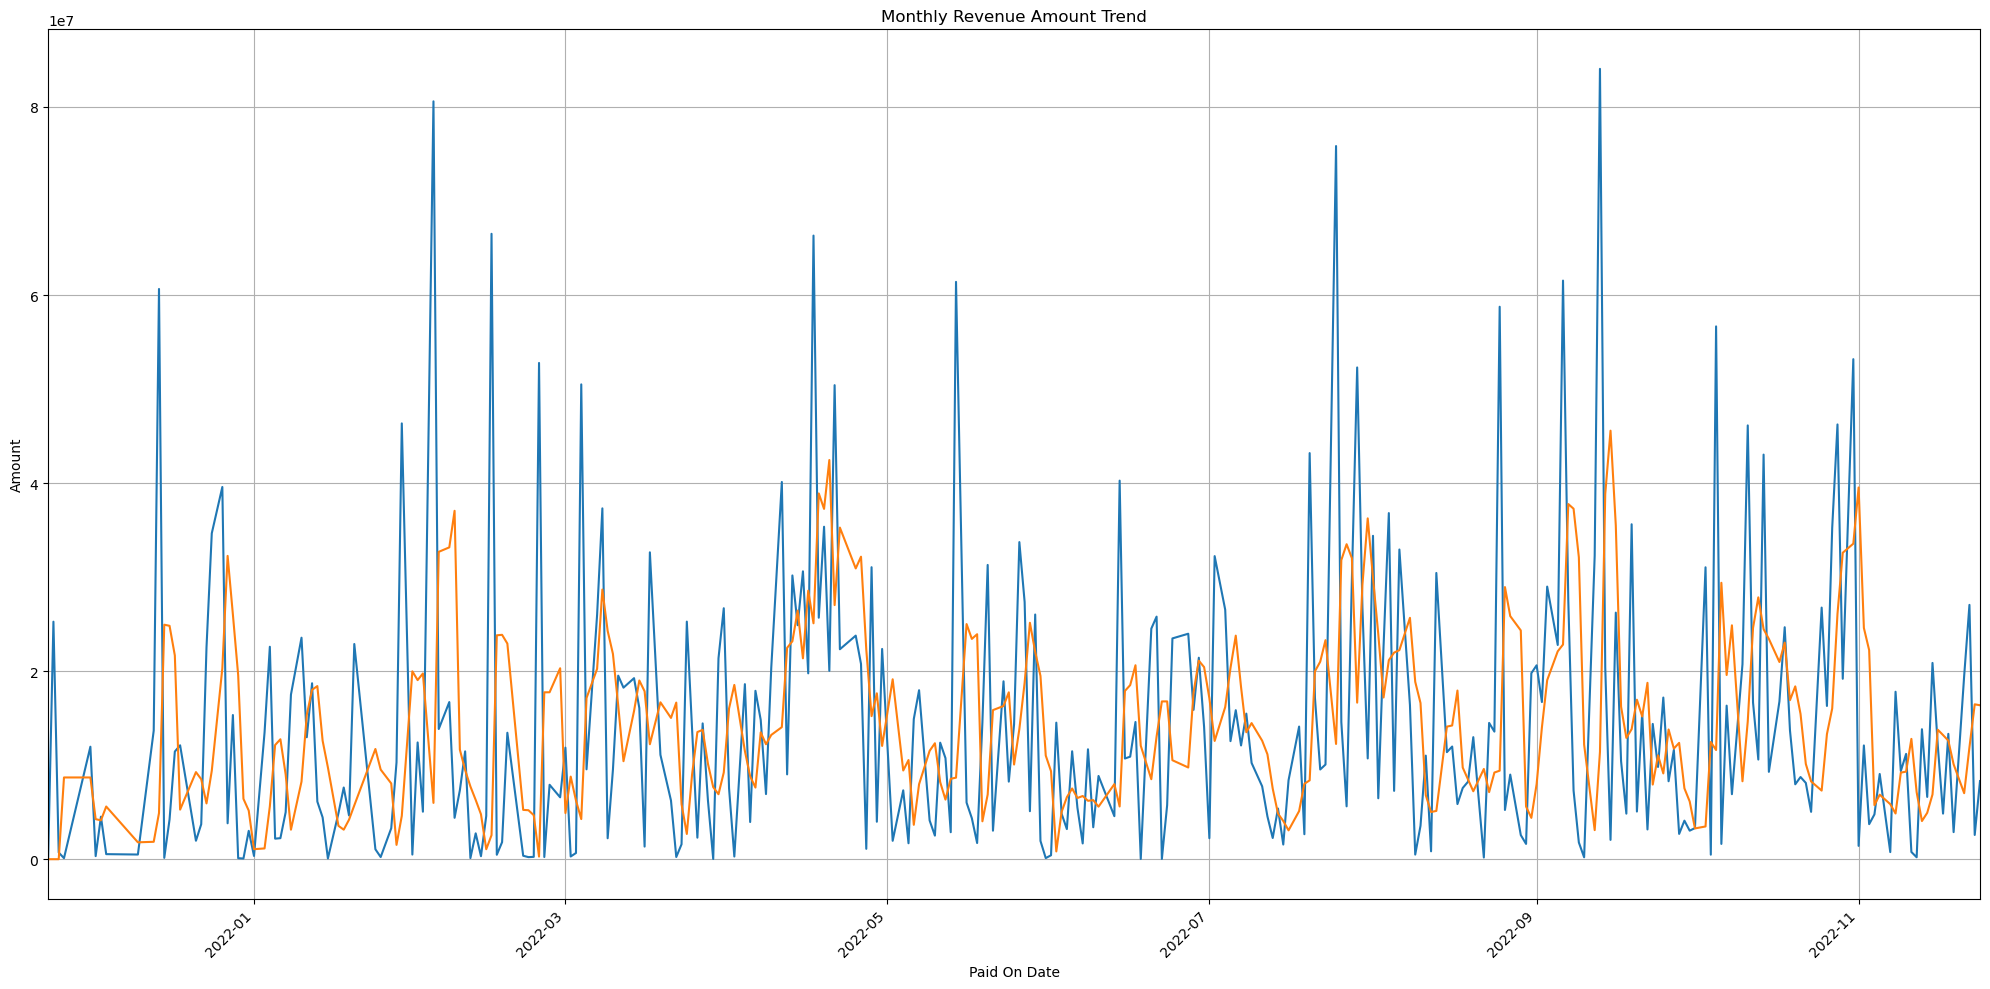

In [1754]:
plot(new_df)

In [1755]:
#this one is not the best and optimal solution for business need

In [1756]:
# 2) Weighted MA
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

#wwightage is given by us, for latest data point, give a higher weightage, past data point, lower wihtage etc
#why do we need this? suppose customer visited 3 months back, and the customer visited a week ago, higher probability pf 
# visiting customer is 1w back one,

In [1757]:
new_df['wma_rolling_3']=new_df['amount'].rolling(window=3).apply(wma(np.array([0.75,1,1.5]))).shift(1).fillna(0)

In [1758]:
new_df

amount  ma_rolling_3  wma_rolling_3
paid_on_date                                       
2021-11-23      111095           0.0            0.0
2021-11-24    25258997           0.0            0.0
2021-11-25      709552           0.0            0.0
2021-11-26      110585     8693214.7      8802215.4
2021-12-01    11962203     8693044.7      6606559.1
...                ...           ...            ...
2022-11-19     2879833    10095194.3     11308284.9
2022-11-21    19488085     7020133.7      7095979.4
2022-11-22    27046719    11899656.3     14036749.6
2022-11-23     2579056    16471545.7     20739346.1
2022-11-24     8309358    16371286.7     15177122.2

[305 rows x 3 columns]

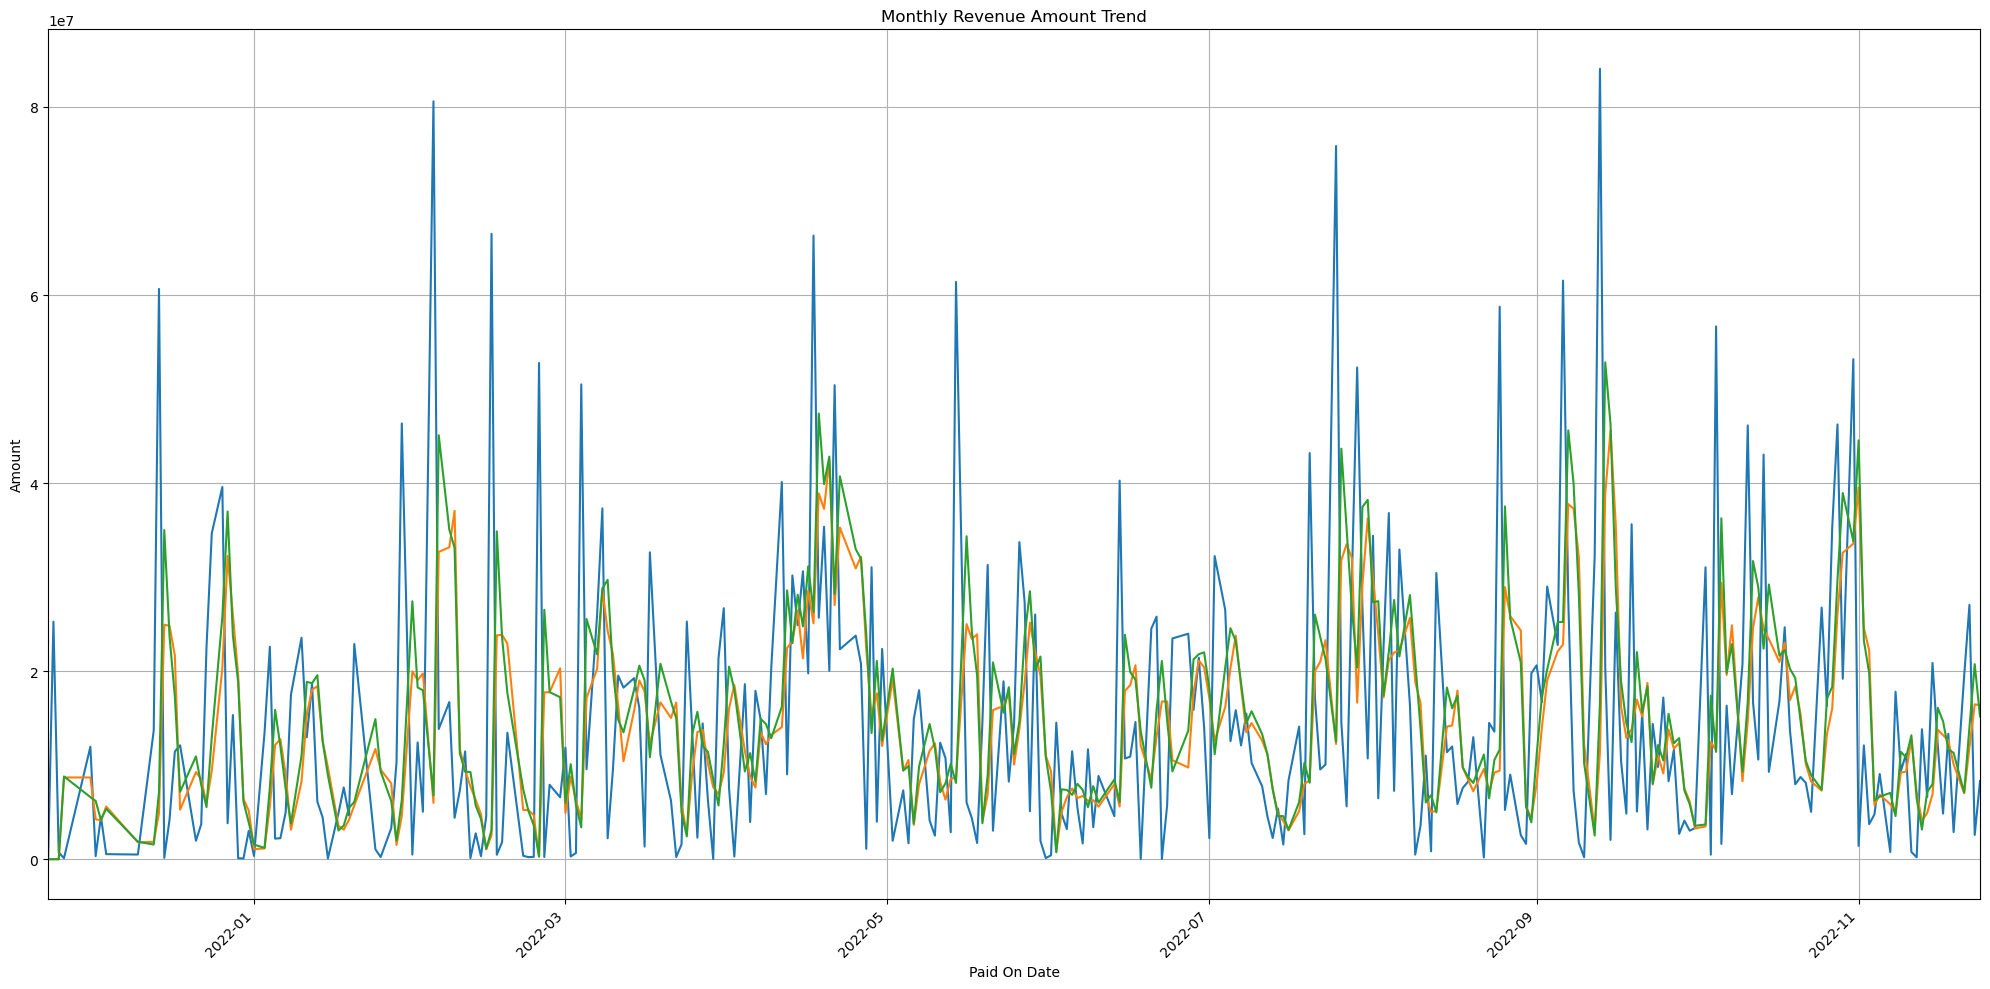

In [1759]:
plot(new_df)

In [1760]:
# 3) Exponential Moving avg
new_df['amount'].ewm(span=3,adjust=False).mean()

paid_on_date
2021-11-23     111095.0
2021-11-24   12685046.0
2021-11-25    6697299.0
2021-11-26    3403942.0
2021-12-01    7683072.5
                ...    
2022-11-19    7022474.3
2022-11-21   13255279.6
2022-11-22   20150999.3
2022-11-23   11365027.7
2022-11-24    9837192.8
Name: amount, Length: 305, dtype: float64

In [1761]:
new_df['exp_roll_3']=new_df['amount'].ewm(span=3,adjust=False).mean().shift(1).fillna(0)

In [1762]:
new_df

amount  ma_rolling_3  wma_rolling_3  exp_roll_3
paid_on_date                                                   
2021-11-23      111095           0.0            0.0         0.0
2021-11-24    25258997           0.0            0.0    111095.0
2021-11-25      709552           0.0            0.0  12685046.0
2021-11-26      110585     8693214.7      8802215.4   6697299.0
2021-12-01    11962203     8693044.7      6606559.1   3403942.0
...                ...           ...            ...         ...
2022-11-19     2879833    10095194.3     11308284.9  11165115.5
2022-11-21    19488085     7020133.7      7095979.4   7022474.3
2022-11-22    27046719    11899656.3     14036749.6  13255279.6
2022-11-23     2579056    16471545.7     20739346.1  20150999.3
2022-11-24     8309358    16371286.7     15177122.2  11365027.7

[305 rows x 4 columns]

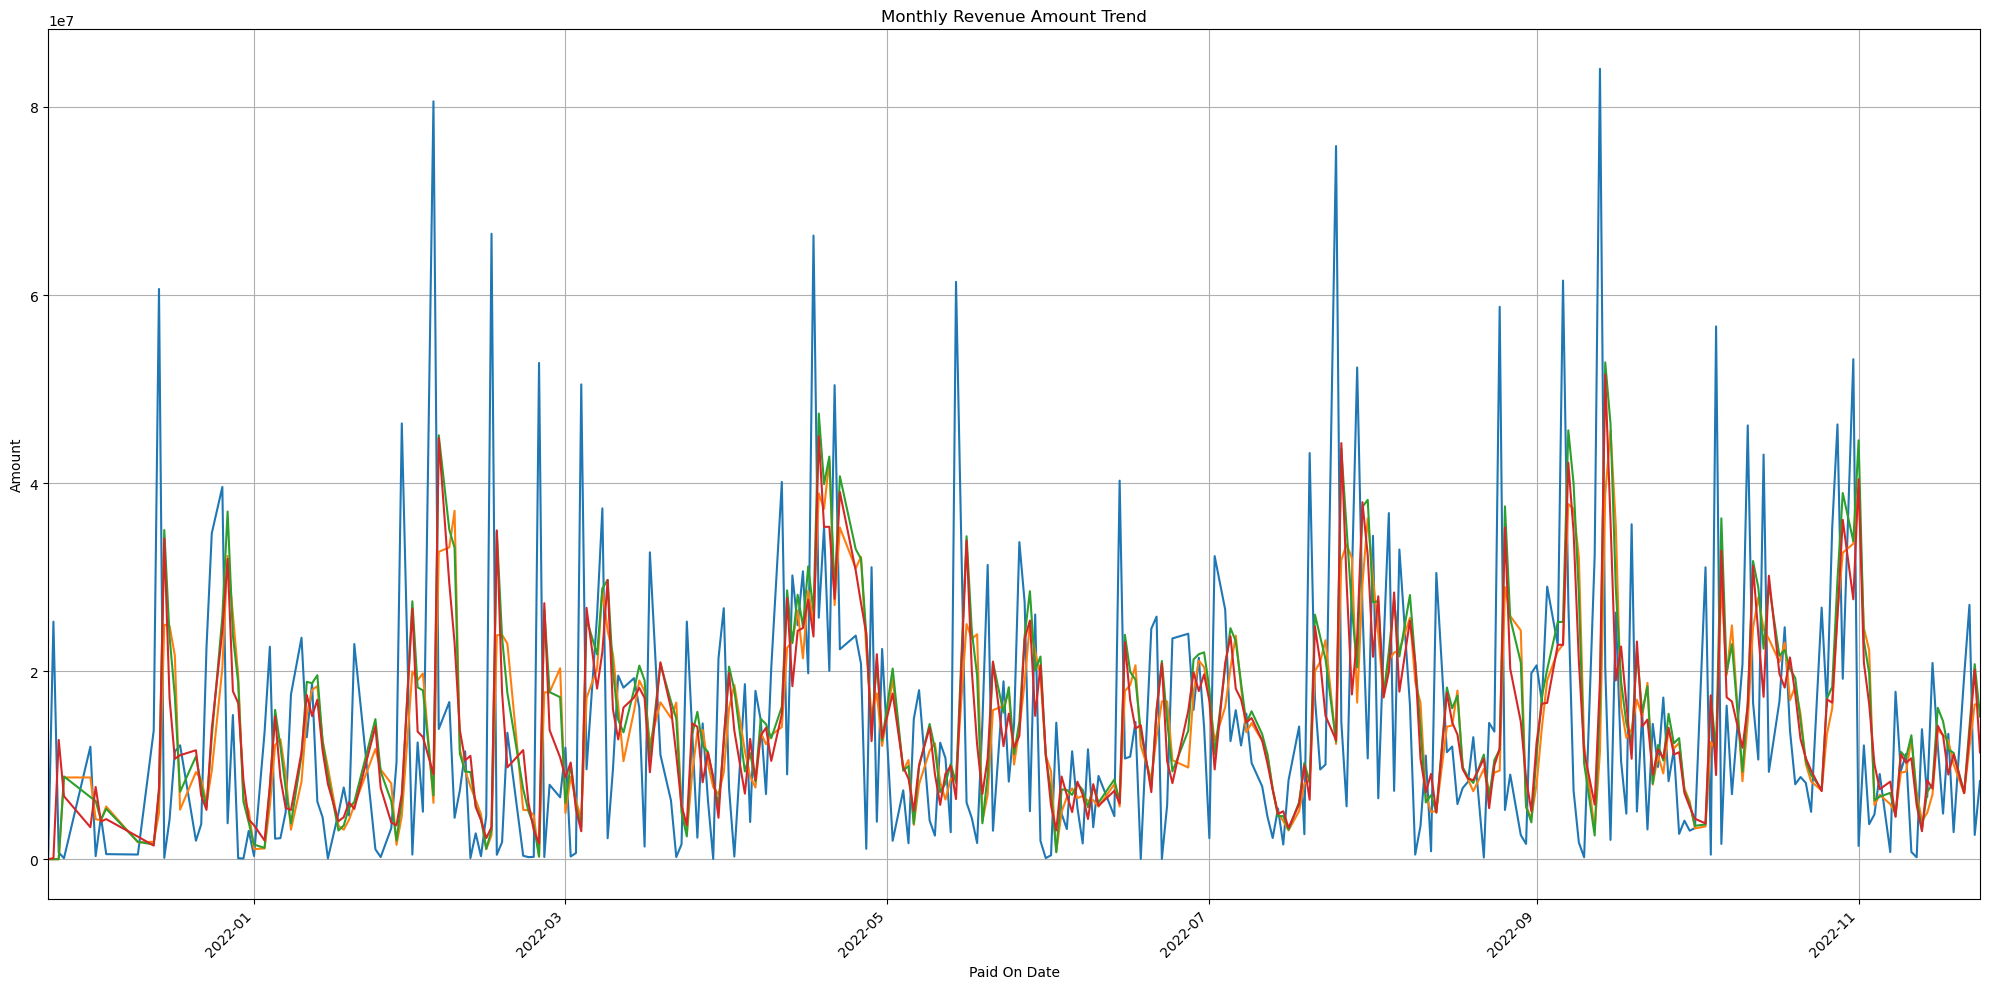

In [1763]:
plot(new_df)

In [1764]:
# 4) Exponential Smoothing avg

In [1765]:
new_df['amount'].ewm(alpha=0.8,adjust=False,min_periods=3).mean()
#alpha is smoothening constant(0-1), large alpha->latest data point

paid_on_date
2021-11-23          NaN
2021-11-24          NaN
2021-11-25    4613524.9
2021-11-26    1011173.0
2021-12-01    9771997.0
                ...    
2022-11-19    4698621.9
2022-11-21   16530192.4
2022-11-22   24943413.7
2022-11-23    7051927.5
2022-11-24    8057871.9
Name: amount, Length: 305, dtype: float64

In [1766]:
new_df['sm_exp_roll3']=new_df['amount'].ewm(alpha=0.4,adjust=False,min_periods=3).mean().shift(1).fillna(0)

In [1767]:
new_df

amount  ma_rolling_3  wma_rolling_3  exp_roll_3  sm_exp_roll3
paid_on_date                                                                 
2021-11-23      111095           0.0            0.0         0.0           0.0
2021-11-24    25258997           0.0            0.0    111095.0           0.0
2021-11-25      709552           0.0            0.0  12685046.0           0.0
2021-11-26      110585     8693214.7      8802215.4   6697299.0     6385974.3
2021-12-01    11962203     8693044.7      6606559.1   3403942.0     3875818.6
...                ...           ...            ...         ...           ...
2022-11-19     2879833    10095194.3     11308284.9  11165115.5    11006197.1
2022-11-21    19488085     7020133.7      7095979.4   7022474.3     7755651.5
2022-11-22    27046719    11899656.3     14036749.6  13255279.6    12448624.9
2022-11-23     2579056    16471545.7     20739346.1  20150999.3    18287862.5
2022-11-24     8309358    16371286.7     15177122.2  11365027.7    12004339.9

[305 rows x 5 columns]

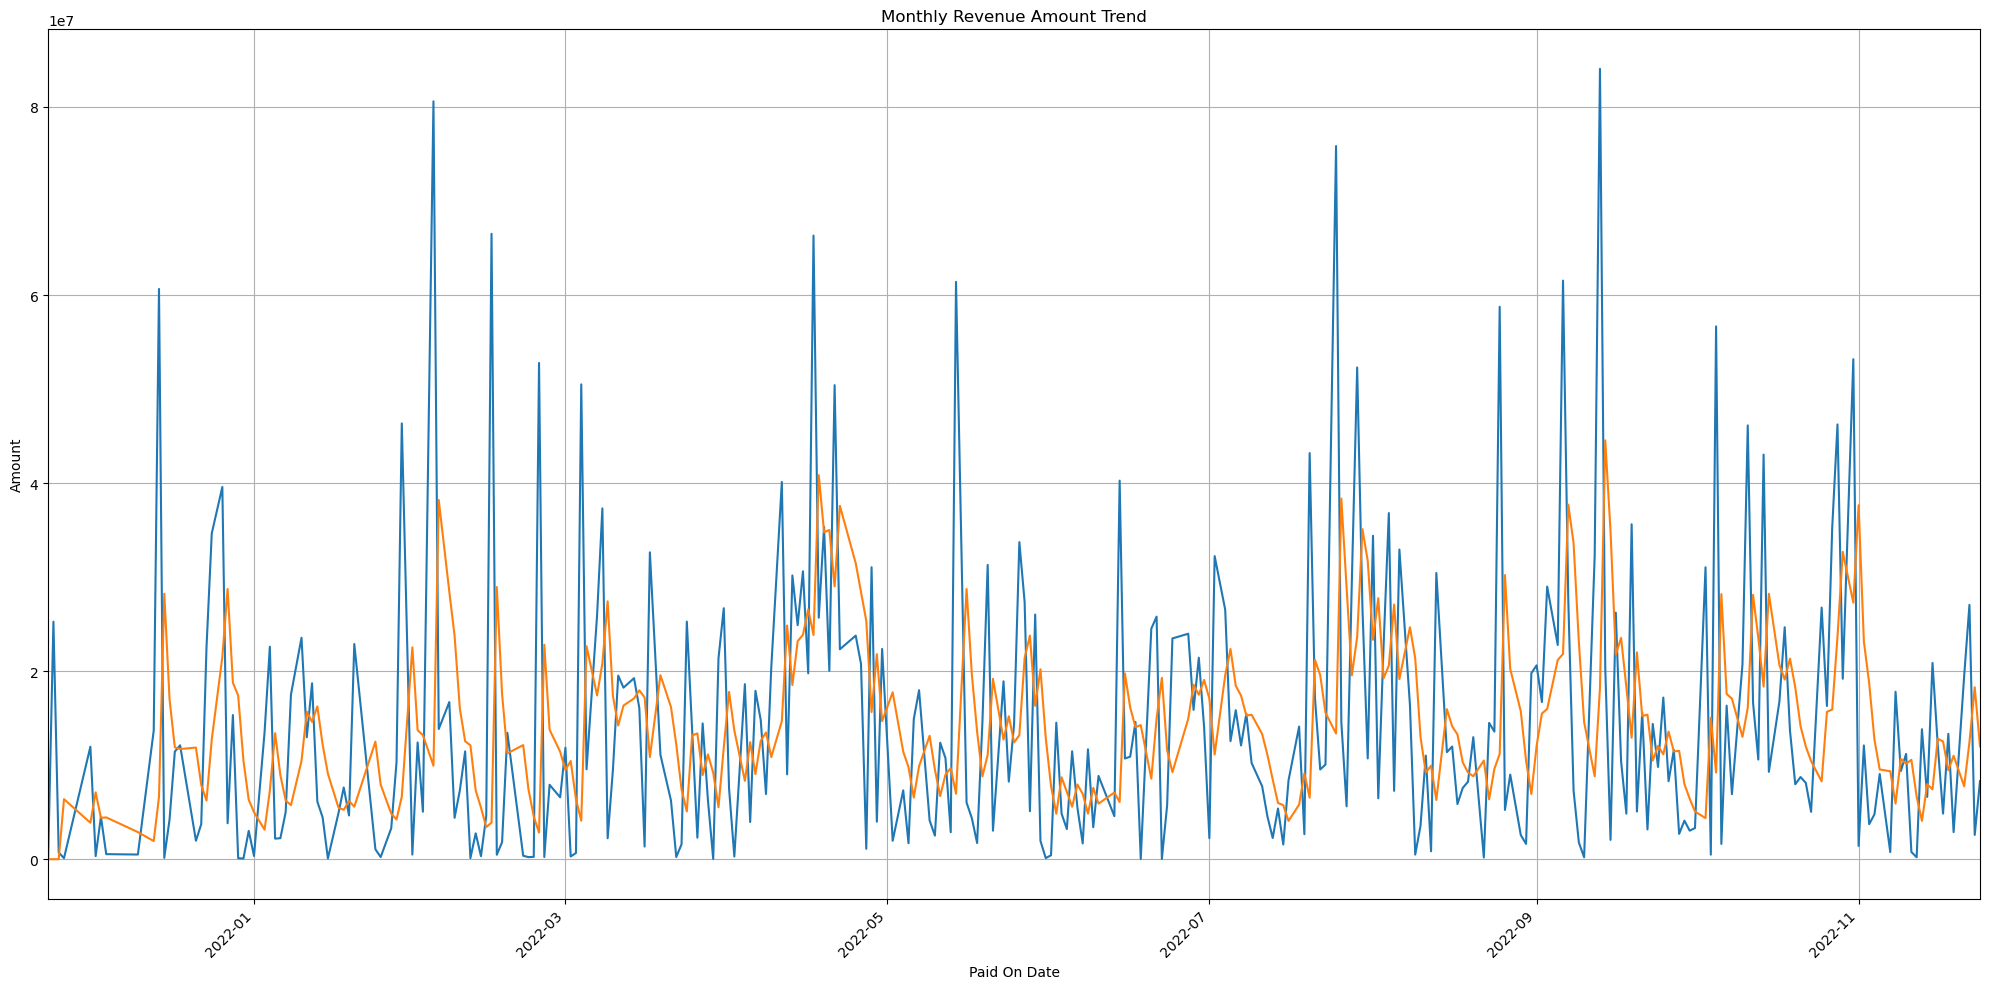

In [1768]:
plot(new_df[['amount','sm_exp_roll3']])


In [1769]:
new_df.sample(5)

amount  ma_rolling_3  wma_rolling_3  exp_roll_3  sm_exp_roll3
paid_on_date                                                                 
2022-04-11    40117004    14045342.7     16210325.0  15424203.9    14673985.3
2022-07-05    12556599    20333910.3     24570057.2  23712232.7    22357307.1
2022-07-21    17159888    19983387.3     26005967.4  24754308.7    21197175.8
2022-06-06     5481594     6507136.7      8016653.8   8243567.1     7938550.9
2022-03-12    18244063    10422707.7     13490752.8  16129885.5    16338565.3

In [1770]:
from sklearn.metrics import mean_squared_error
columns_to_compare = ['ma_rolling_3', 'wma_rolling_3', 'exp_roll_3', 'sm_exp_roll3']

for column in columns_to_compare:
    mse = mean_squared_error(new_df['amount'], new_df[column])
    rmse = np.sqrt(mse)
    print(f'RMSE for {column}: {rmse}')

RMSE for ma_rolling_3: 17301091.092367657
RMSE for wma_rolling_3: 17919349.873222183
RMSE for exp_roll_3: 17300381.332009442
RMSE for sm_exp_roll3: 16737494.991226872


# Starting with Different Time Series Models like AR, MA, ARMA, ARIMA 

In [1771]:
import warnings
warnings.filterwarnings('ignore')

In [1772]:
df1

amount
paid_on_date          
2021-11-23      111095
2021-11-24    25258997
2021-11-25      709552
2021-11-26      110585
2021-12-01    11962203
...                ...
2022-11-19     2879833
2022-11-21    19488085
2022-11-22    27046719
2022-11-23     2579056
2022-11-24     8309358

[305 rows x 1 columns]

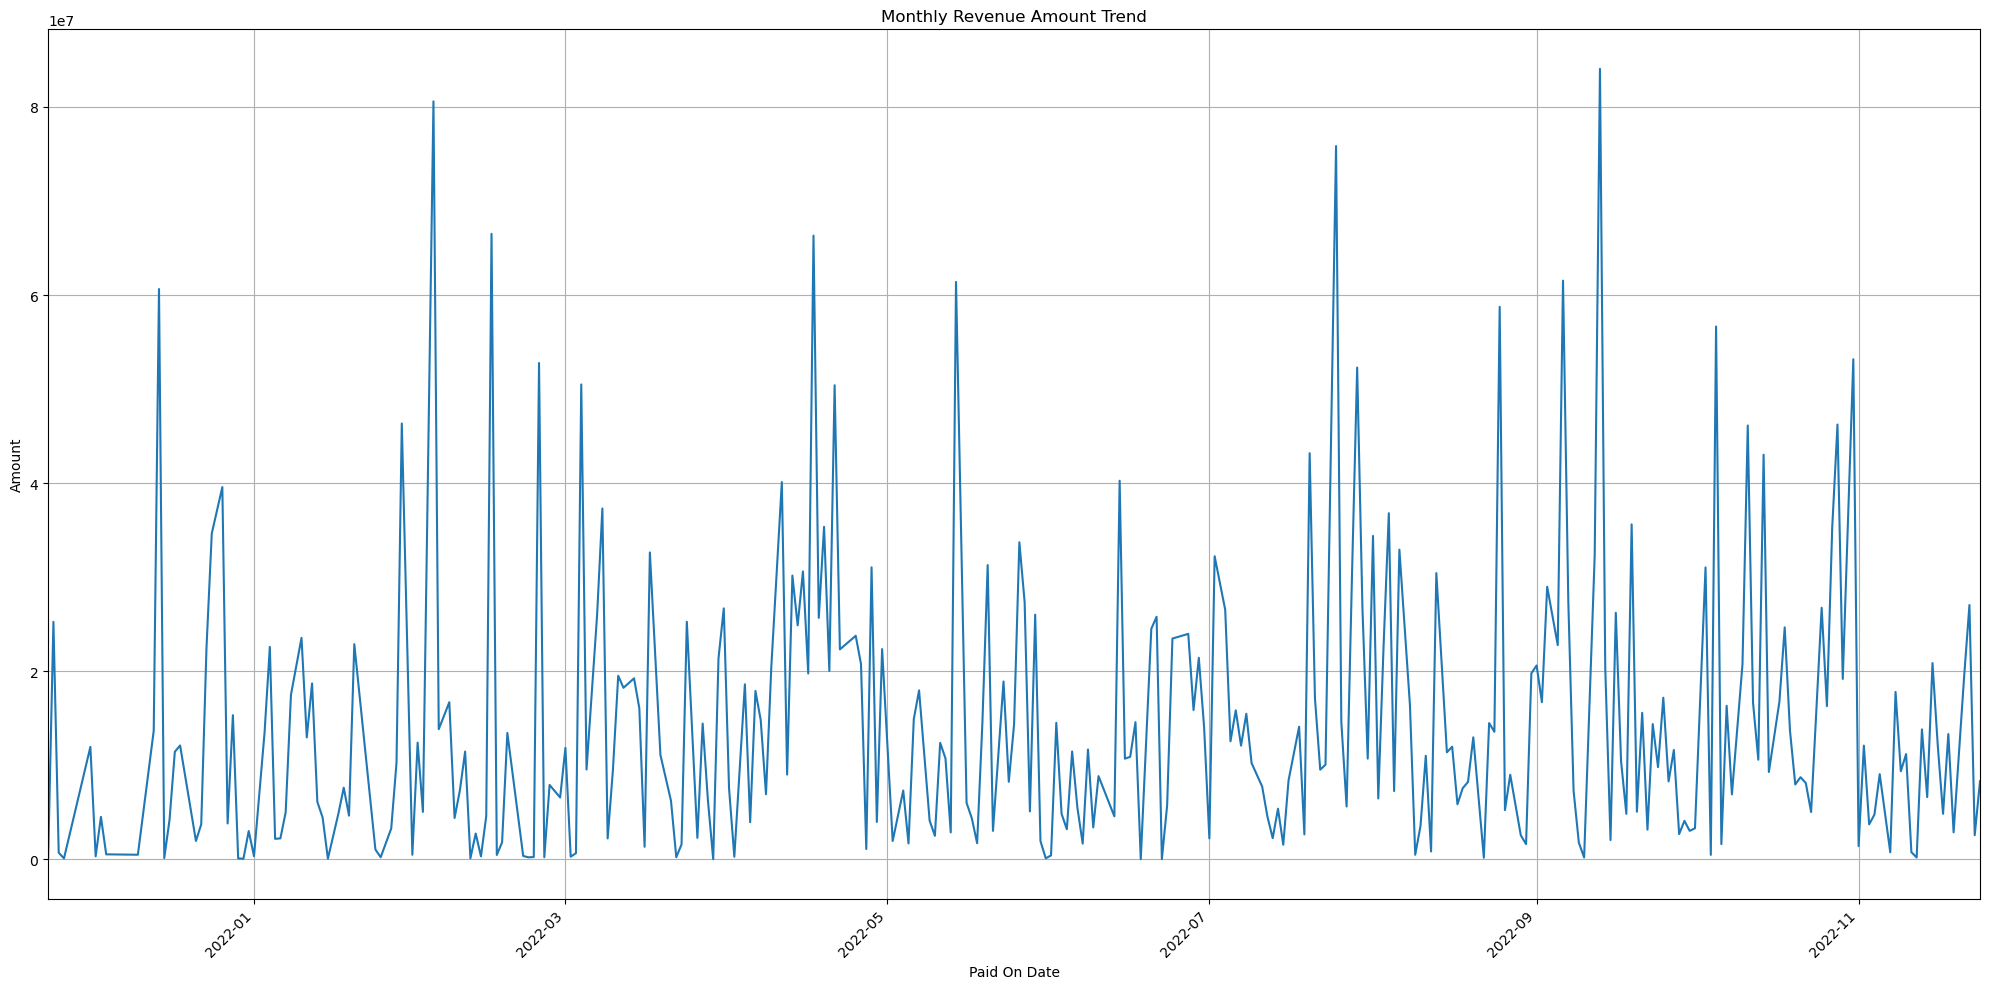

In [1773]:
plot(df1)

In [1774]:
from statsmodels.tsa.stattools import adfuller
def stationary(data, var):
    data['rollmean'] = data[var].rolling(window=45).mean()
    data['rollStd'] = data[var].rolling(window=45).std()

    adfTest = adfuller(data[var], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Stats', 'p-value', '#Lags used', 'number of observations'])
    print(stats)

    for key, value in adfTest[4].items():
        print('criticality: ', key, ": ", value)

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x=data.index, y=data[var])
    sns.lineplot(data=data, x=data.index, y=data['rollmean'])
    sns.lineplot(data=data, x=data.index, y=data['rollStd'])
    plt.show()

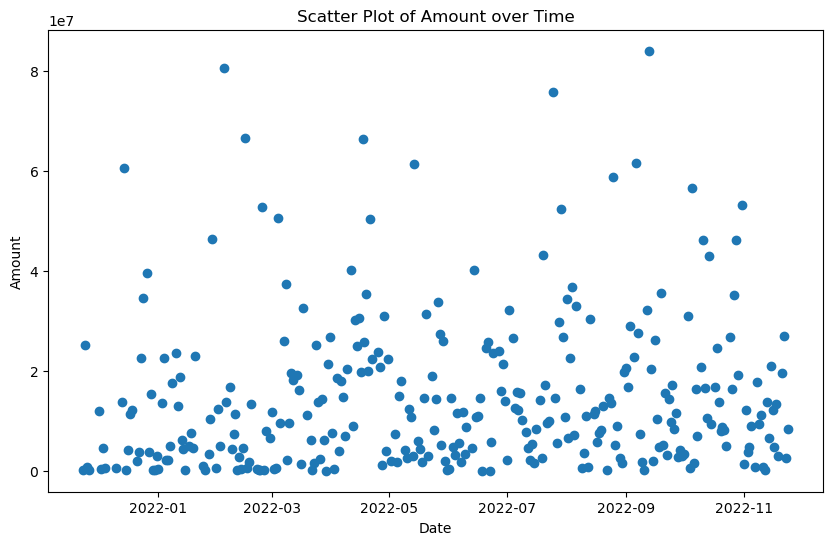

In [1775]:
from statsmodels.stats.stattools import durbin_watson

plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount over Time')
plt.show()

In [1776]:
residuals = df1['amount'] - df1['amount'].mean()
durbin_watson_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 1.9323260676661764


<AxesSubplot:xlabel='amount'>

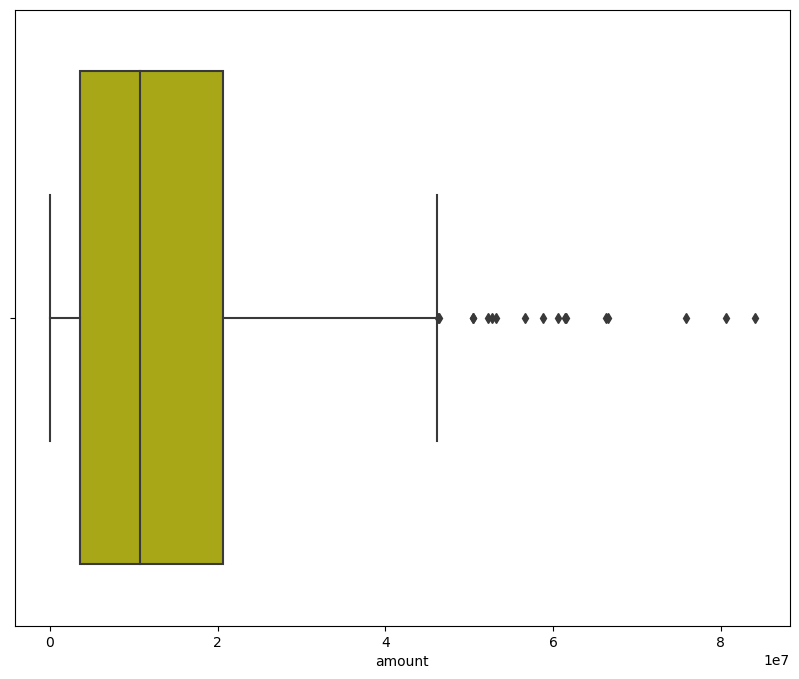

In [1777]:
sns.boxplot(df1['amount'],color='y')

In [1778]:
q1=df['amount'].describe()['25%']
q3=df1['amount'].describe()['75%']
iqr=q3-q1                #finding Interquartile Range
print(iqr)

7050945.0


In [1779]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print("Lower Bound: ",lower,'\n',"Upper Bound: ",upper)

Lower Bound:  2992568.5 
 Upper Bound:  31196348.5


In [1780]:
total_outliers = df1[(df1['amount'] < lower) | (df1['amount'] > upper)].shape[0]
print("Total outliers:", total_outliers)

Total outliers: 104


In [1781]:
df1['amount']=[upper if x>upper else x for x in df1['amount']]

<AxesSubplot:xlabel='amount'>

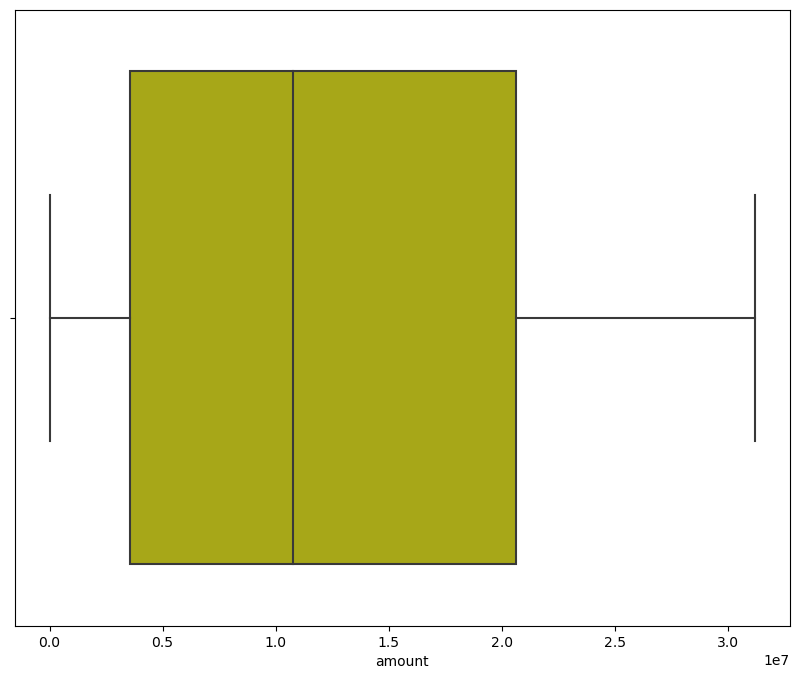

In [1782]:
sns.boxplot(df1['amount'],color='y')

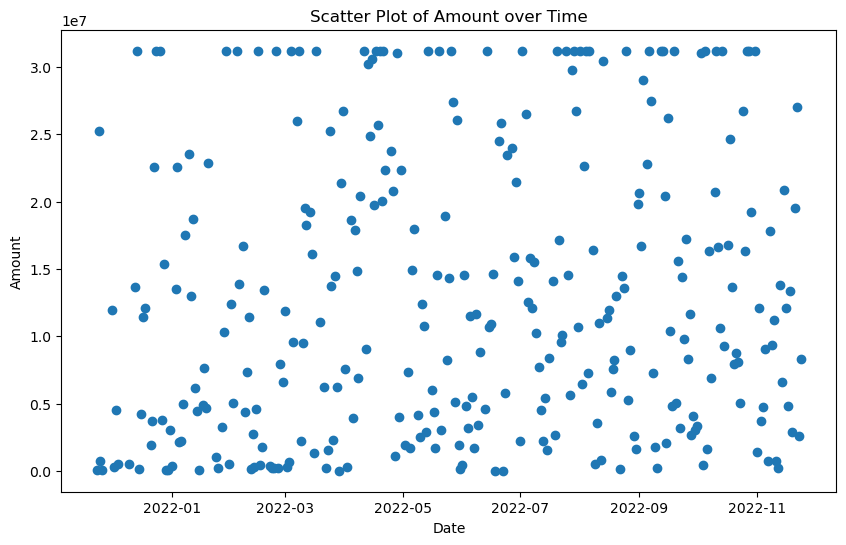

In [1783]:
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount over Time')
plt.show()

In [1784]:
residuals = df1['amount'] - df1['amount'].mean()
durbin_watson_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 1.825691516368938


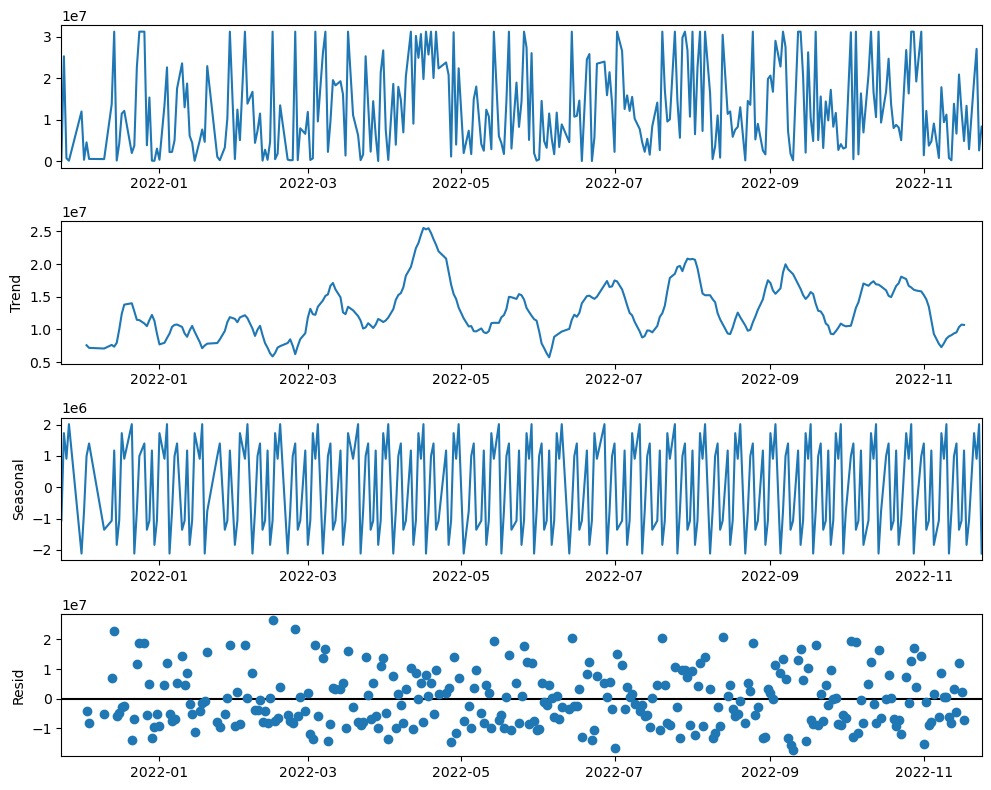

In [1785]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
rcParams['figure.figsize']=10,8
decomposition = seasonal_decompose(df1, model='additive', period=12)
fig=decomposition.plot()
plt.show()

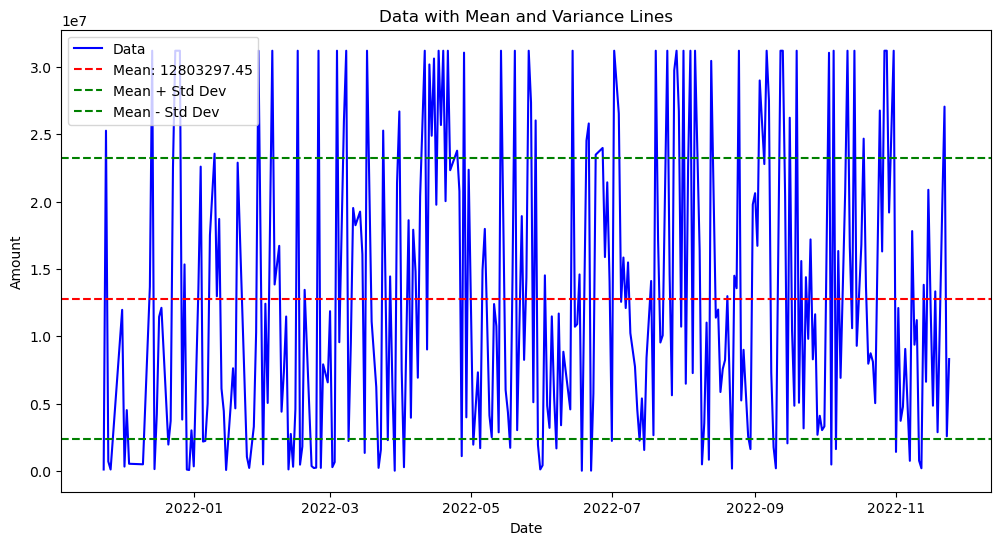

In [1786]:
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['amount'], label='Data', color='blue')

# Mark mean and variance with different colored lines
mean_value = df1['amount'].mean()
variance_value = df1['amount'].var()

plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=mean_value + np.sqrt(variance_value), color='green', linestyle='--', label=f'Mean + Std Dev')
plt.axhline(y=mean_value - np.sqrt(variance_value), color='green', linestyle='--', label=f'Mean - Std Dev')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Data with Mean and Variance Lines')
plt.legend()
plt.show()

In [1787]:
def stationary(data,var):
    data['rollmean']=data[var].rolling(window=45).mean()
    data['rollStd']=data[var].rolling(window=45).std()
    
    adfTest=adfuller(data[var],autolag='AIC')
    stats=pd.Series(adfTest[0:4],index=['Test Stats','p-value','#Lags used','number of observations'])
    print(stats)
    
    for key,value in adfTest[4].items():
        print('criticality: ',key,": ",value)
        
    plt.figure(figsize=(10,5))
    sns.lineplot(data=data,x=data.index,y=var)
    sns.lineplot(data=data,x=data.index,y=data.rollmean)
    sns.lineplot(data=data,x=data.index,y=data.rollStd)
    plt.show()

Test Stats               -10.4
p-value                    0.0
#Lags used                 1.0
number of observations   303.0
dtype: float64
criticality:  1% :  -3.4521175397304784
criticality:  5% :  -2.8711265007266666
criticality:  10% :  -2.571877823851692


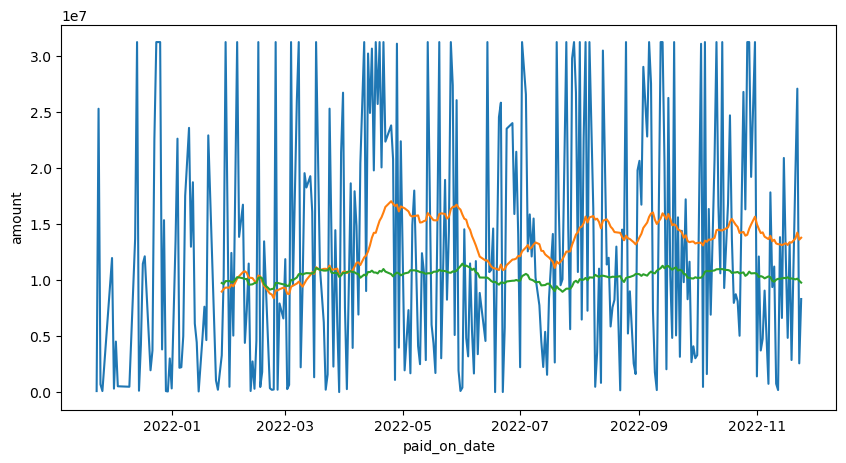

In [1788]:
stationary(df1,'amount')

In [1789]:
# df1['rollmean']=df1.amount.rolling(window=45).mean()
# df1['rollStd']=df1.amount.rolling(window=45).std()

In [1790]:
# plt.figure(figsize=(10,5))
# sns.lineplot(data=df1,x=df1.index,y=df1.amount)
# sns.lineplot(data=df1,x=df1.index,y=df1.rollmean)
# sns.lineplot(data=df1,x=df1.index,y=df1.rollStd)
# plt.show()

In [1791]:
# adfTest=adfuller(df1['amount'],autolag='AIC')

In [1792]:
# adfTest

In [1793]:
# stats=pd.Series(adfTest[0:4],index=['Test Stats','p-value','#Lags used','number of observations'])

In [1794]:
# stats

In [1795]:
# for key,value in adfTest[4].items():
#     print('criticality: ',key,": ",value)
    
    
#     #Test stats should be less than critical values   C>T
#     #but here, our critical values are less than stats value, so it is clearly not Stationary data

In [1796]:
# How to make data stationary?
# 1) Time Shift
# 2) Log operation
# 3) Square Root/ Cube Root

In [1797]:
# df1['log_amount']=np.log(df1['amount'])
# df1['sqrt_amount']=np.sqrt(df1['amount'])
# df1['cubrt_amount']=np.cbrt(df1['amount'])

In [1798]:
df1.head()

amount  rollmean  rollStd
paid_on_date                              
2021-11-23     111095.0       NaN      NaN
2021-11-24   25258997.0       NaN      NaN
2021-11-25     709552.0       NaN      NaN
2021-11-26     110585.0       NaN      NaN
2021-12-01   11962203.0       NaN      NaN

In [1799]:
df=df1[['amount']]
df.head()

amount
paid_on_date           
2021-11-23     111095.0
2021-11-24   25258997.0
2021-11-25     709552.0
2021-11-26     110585.0
2021-12-01   11962203.0

In [1800]:
#time shift
df['shift']=df['amount'].shift(30)

#finding the difference
df['shift_diff']=df.amount-df['shift']

df.head()

amount  shift  shift_diff
paid_on_date                              
2021-11-23     111095.0    NaN         NaN
2021-11-24   25258997.0    NaN         NaN
2021-11-25     709552.0    NaN         NaN
2021-11-26     110585.0    NaN         NaN
2021-12-01   11962203.0    NaN         NaN

Test Stats               -18.7
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


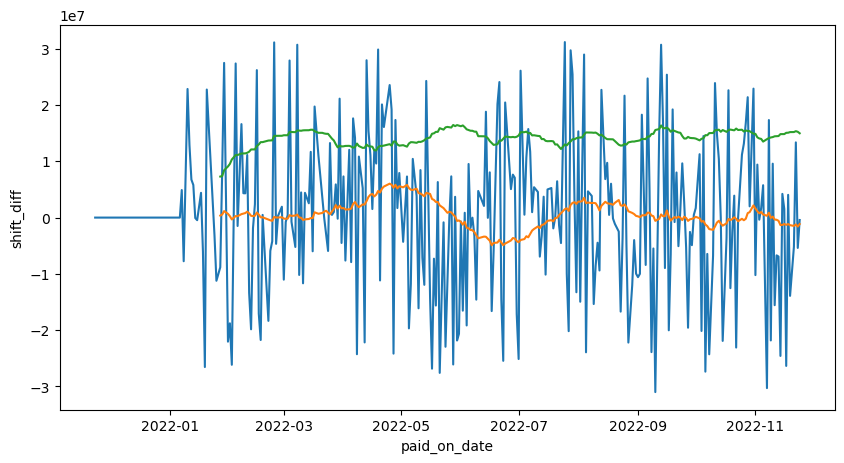

In [1801]:
stationary(df.fillna(0),'shift_diff')

In [1802]:
log_df=df1[['amount']]
log_df['log_amount']=np.log(log_df['amount'])
log_df.head()

amount  log_amount
paid_on_date                       
2021-11-23     111095.0        11.6
2021-11-24   25258997.0        17.0
2021-11-25     709552.0        13.5
2021-11-26     110585.0        11.6
2021-12-01   11962203.0        16.3

Test Stats               -16.1
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


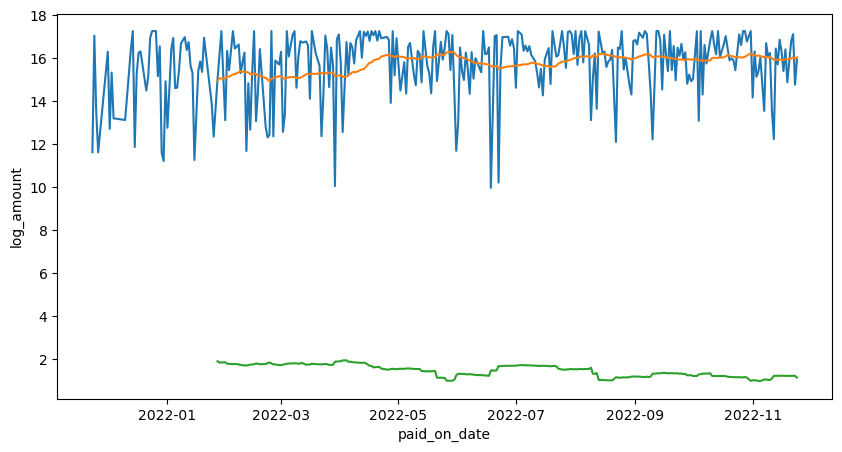

In [1803]:
stationary(log_df,'log_amount')

In [1804]:
# 3) checking with sqrt
sqrt_df=df[['amount']]
sqrt_df['sqrt']=np.sqrt(sqrt_df['amount'])

In [1805]:
sqrt_df.head()

amount   sqrt
paid_on_date                  
2021-11-23     111095.0  333.3
2021-11-24   25258997.0 5025.8
2021-11-25     709552.0  842.3
2021-11-26     110585.0  332.5
2021-12-01   11962203.0 3458.6

Test Stats               -10.5
p-value                    0.0
#Lags used                 1.0
number of observations   303.0
dtype: float64
criticality:  1% :  -3.4521175397304784
criticality:  5% :  -2.8711265007266666
criticality:  10% :  -2.571877823851692


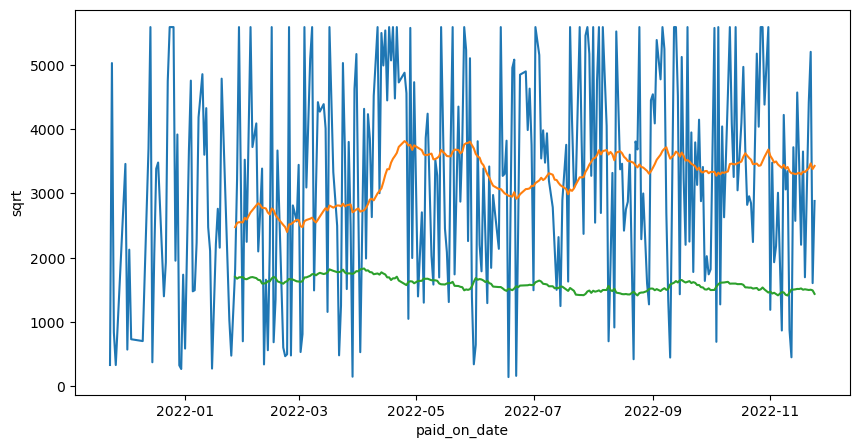

In [1806]:
stationary(sqrt_df,'sqrt')

In [1807]:
#checking for cube root
cbrt_df=df[['amount']]
cbrt_df['cbrt']=np.cbrt(cbrt_df['amount'])

In [1808]:
cbrt_df.head()

amount  cbrt
paid_on_date                 
2021-11-23     111095.0  48.1
2021-11-24   25258997.0 293.4
2021-11-25     709552.0  89.2
2021-11-26     110585.0  48.0
2021-12-01   11962203.0 228.7

Test Stats               -10.6
p-value                    0.0
#Lags used                 1.0
number of observations   303.0
dtype: float64
criticality:  1% :  -3.4521175397304784
criticality:  5% :  -2.8711265007266666
criticality:  10% :  -2.571877823851692


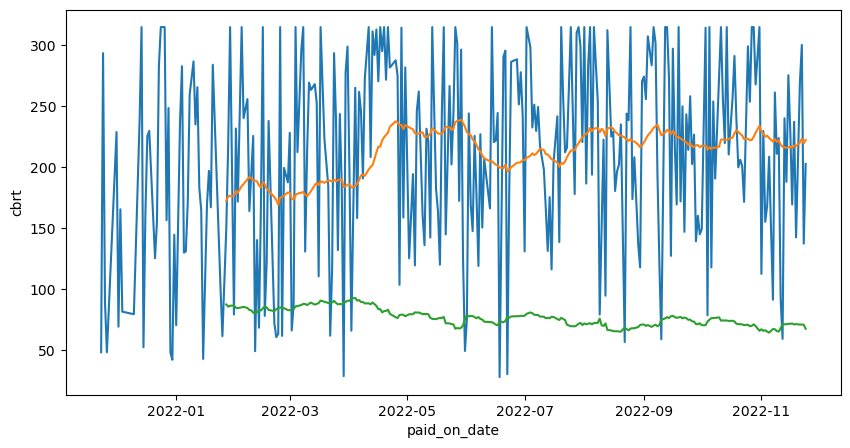

In [1809]:
stationary(cbrt_df,'cbrt')

In [1810]:
#4 Combining log -> sqrt
logdf2=log_df[['amount','log_amount']]
logdf2['lgsqrt']=np.sqrt(log_df['log_amount'])
logdf2.head()

amount  log_amount  lgsqrt
paid_on_date                               
2021-11-23     111095.0        11.6     3.4
2021-11-24   25258997.0        17.0     4.1
2021-11-25     709552.0        13.5     3.7
2021-11-26     110585.0        11.6     3.4
2021-12-01   11962203.0        16.3     4.0

Test Stats               -16.1
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


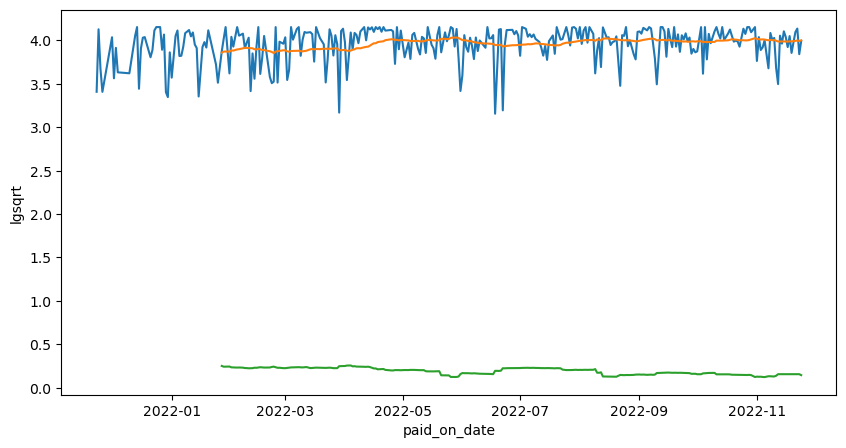

In [1811]:
stationary(logdf2,'lgsqrt')

In [1812]:
#4 Combining log -> cuberoot
logdf3=log_df[['amount','log_amount']]
logdf3['lgcbrt']=np.cbrt(log_df['log_amount'])
logdf3.head()

amount  log_amount  lgcbrt
paid_on_date                               
2021-11-23     111095.0        11.6     2.3
2021-11-24   25258997.0        17.0     2.6
2021-11-25     709552.0        13.5     2.4
2021-11-26     110585.0        11.6     2.3
2021-12-01   11962203.0        16.3     2.5

Test Stats               -16.1
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


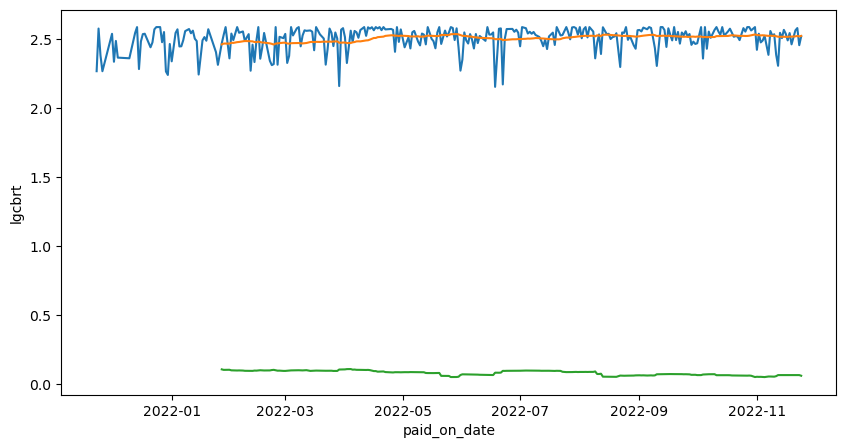

In [1813]:
stationary(logdf3,'lgcbrt')

In [1814]:
#5 Combining log -> sqroot and shift
logdf4=log_df[['amount','log_amount']]
logdf4['lgsqrt']=np.sqrt(log_df['log_amount'])
logdf4['lgsqrt_amount']=logdf4['lgsqrt']-logdf4['lgsqrt'].shift(30)
logdf4.head()

amount  log_amount  lgsqrt  lgsqrt_amount
paid_on_date                                              
2021-11-23     111095.0        11.6     3.4            NaN
2021-11-24   25258997.0        17.0     4.1            NaN
2021-11-25     709552.0        13.5     3.7            NaN
2021-11-26     110585.0        11.6     3.4            NaN
2021-12-01   11962203.0        16.3     4.0            NaN

Test Stats               -17.8
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


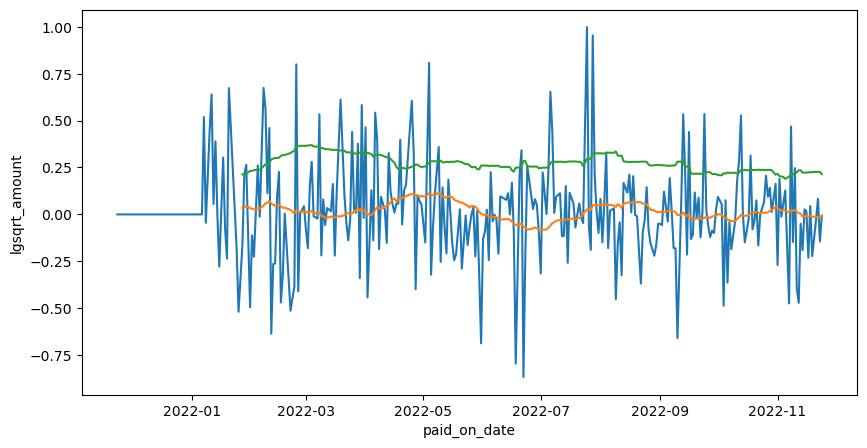

In [1815]:
stationary(logdf4.fillna(0),'lgsqrt_amount')

In [1816]:
#5 Combining log -> sqroot and shift
logdf5 = log_df[['amount', 'log_amount']]
logdf5['lgcbrt'] = np.cbrt(log_df['log_amount'])
logdf5['lgcbrt_amount'] = logdf5['lgcbrt'] - logdf5['lgcbrt'].shift(30)
logdf5.head()

amount  log_amount  lgcbrt  lgcbrt_amount
paid_on_date                                              
2021-11-23     111095.0        11.6     2.3            NaN
2021-11-24   25258997.0        17.0     2.6            NaN
2021-11-25     709552.0        13.5     2.4            NaN
2021-11-26     110585.0        11.6     2.3            NaN
2021-12-01   11962203.0        16.3     2.5            NaN

Test Stats               -17.8
p-value                    0.0
#Lags used                 0.0
number of observations   304.0
dtype: float64
criticality:  1% :  -3.452045317832011
criticality:  5% :  -2.871094805558846
criticality:  10% :  -2.571860921485457


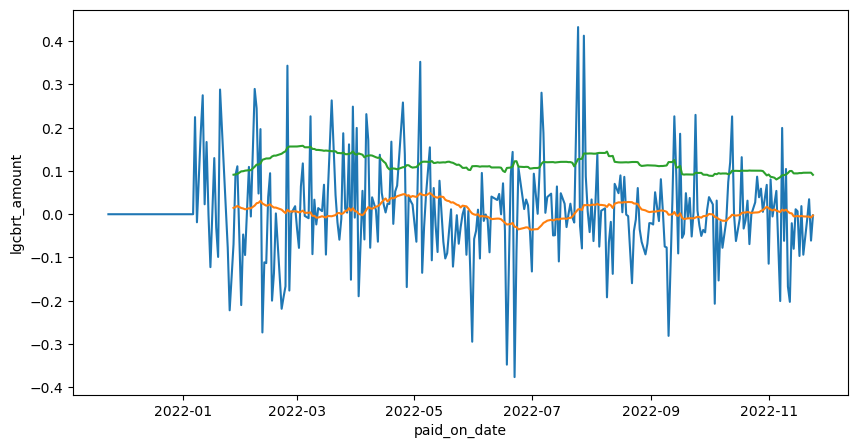

In [1817]:
stationary(logdf5.fillna(0),'lgcbrt_amount')

In [1818]:
#Making Model: ARIMA

In [1819]:
#We'll do modelling in both og data and transformed data
# lets go through og data first

In [1820]:
df=df[['amount']]
df.index = pd.date_range(start='2021-11-23', periods=len(df.index), freq='B')
df['first_diff']=df['amount'].diff()
df['30_diff']=df['amount'].diff(30)

In [1821]:
df.index

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23'],
              dtype='datetime64[ns]', length=305, freq='B')

In [1822]:
df.head()

amount  first_diff  30_diff
2021-11-23   111095.0         NaN      NaN
2021-11-24 25258997.0  25147902.0      NaN
2021-11-25   709552.0 -24549445.0      NaN
2021-11-26   110585.0   -598967.0      NaN
2021-11-29 11962203.0  11851618.0      NaN

In [1823]:
from statsmodels.tsa.arima.model import ARIMA

In [1824]:
#p,d,q
# AR-Auto regressive(p)  Using PACF
# Integration (d) -> diff(), how many shift(30) we r taking, in above case, 1, 30 etc
# Moving Avg (q)  Using ACF

#how to find it?

In [1825]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

[]

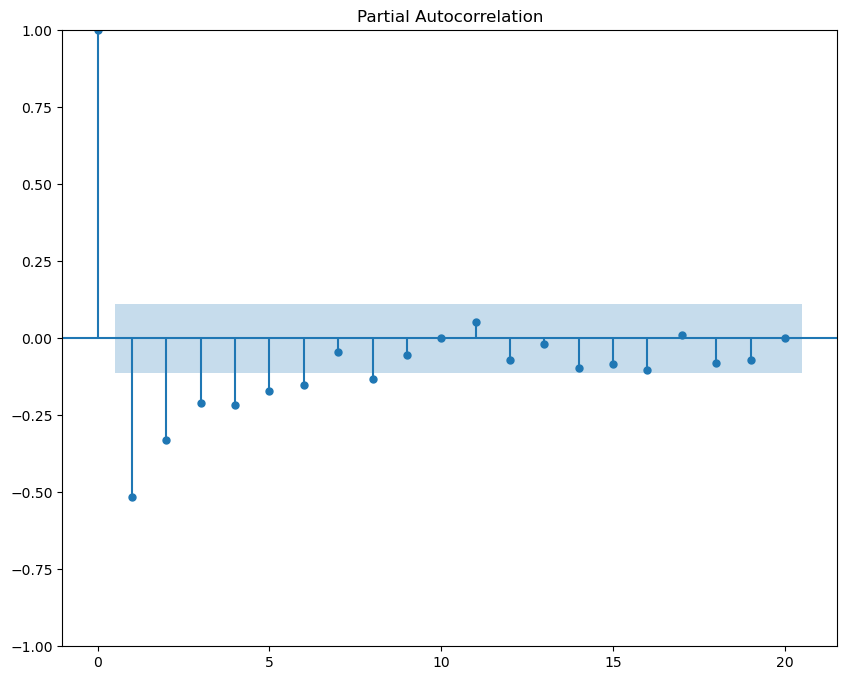

In [1826]:
plot_pacf(df['first_diff'].fillna(0),lags=20)
plt.plot()
#using this,we can take p=1,2,3,4,5,6 , because in blue line, it is exceeding at x=1,2,3,4,5,6

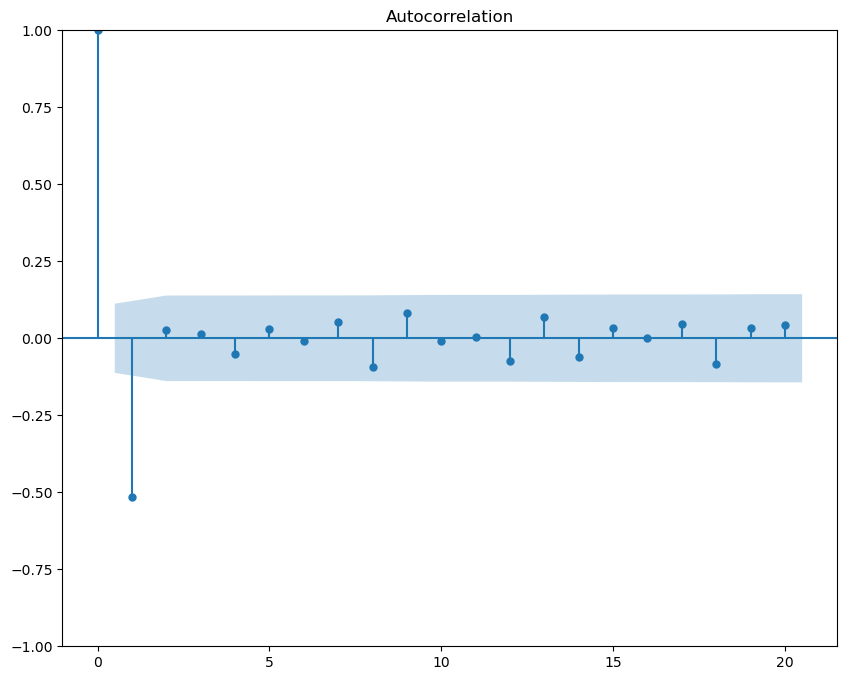

In [1827]:
# for q, we have to plot acf graph
plot_acf(df['first_diff'].fillna(0),lags=20)
plt.show()
#similar like pacf, here strictly we have to take q=1, bcoz every other lines are under significant area

In [1828]:
len(df)
#70% and 30% split for train-test

305

In [1829]:
train=df[:round(len(df)*70/100)]
train.tail()

amount  first_diff     30_diff
2022-09-12   492803.0 -15899937.0 -15353045.0
2022-09-13  3549375.0   3056572.0  -8548181.0
2022-09-14 11015556.0   7466181.0  -4466389.0
2022-09-15   840564.0 -10174992.0  -9394487.0
2022-09-16 30441783.0  29601219.0  22691046.0

In [1830]:
test=df[round(len(df)*70/100):]
test.head()

amount  first_diff   30_diff
2022-09-19 11384661.0 -19057122.0 6837602.0
2022-09-20 11982859.0    598198.0 9727956.0
2022-09-21  5863485.0  -6119374.0  475012.0
2022-09-22  7574755.0   1711270.0 6014028.0
2022-09-23  8239606.0    664851.0 -156517.0

In [1831]:
model=ARIMA(train['amount'],order=(1,1,3))
model_fit=model.fit()

In [1832]:
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

In [1833]:
prediction

2022-09-19   16684589.5
2022-09-20   15966256.5
2022-09-21   16720166.9
2022-09-22   16030527.7
2022-09-23   16661374.8
                ...    
2023-01-17   16360197.1
2023-01-18   16359809.9
2023-01-19   16360164.1
2023-01-20   16359840.1
2023-01-23   16360136.5
Freq: B, Name: predicted_mean, Length: 91, dtype: float64

In [1834]:
df['ARIMA Pred']=prediction
df.tail(10)

amount  first_diff     30_diff  ARIMA Pred
2023-01-10  6623816.0  -7198117.0 -24572532.5  16359679.1
2023-01-11 20873397.0  14249581.0   4210434.0  16360283.7
2023-01-12 12105015.0  -8768382.0   1506704.0  16359730.7
2023-01-13  4849517.0  -7255498.0 -26346831.5  16360236.6
2023-01-16 13331051.0   8481534.0   4039332.0  16359773.8
2023-01-17  2879833.0 -10451218.0 -13901869.0  16360197.1
2023-01-18 19488085.0  16608252.0  -5180652.0  16359809.9
2023-01-19 27046719.0   7558634.0  13359568.0  16360164.1
2023-01-20  2579056.0 -24467663.0  -5387061.0  16359840.1
2023-01-23  8309358.0   5730302.0   -429853.0  16360136.5

In [1835]:
df.isnull().sum()

amount          0
first_diff      1
30_diff        30
ARIMA Pred    214
dtype: int64

<AxesSubplot:ylabel='amount'>

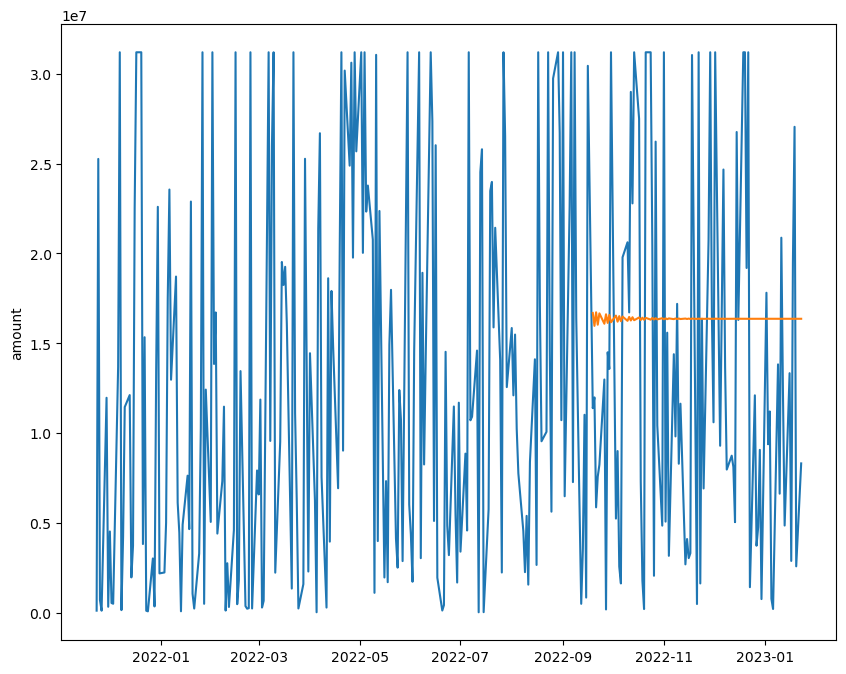

In [1836]:

sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='ARIMA Pred')

In [1837]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['amount'],prediction))


#not getting good results

10365883.220088946

In [1838]:
# For fixing, we have to use SARIMAX, Seasonal ARIMAX

In [1839]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1840]:
#here we will use ACF and PCF

[]

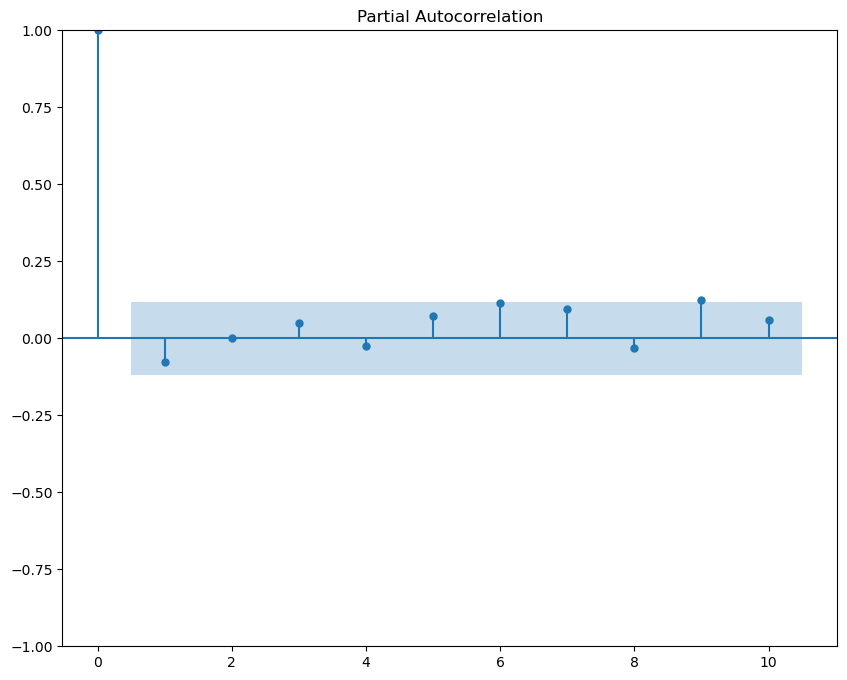

In [1841]:
plot_pacf(df['30_diff'].dropna(),lags=10)
plt.plot()
# p=1

[]

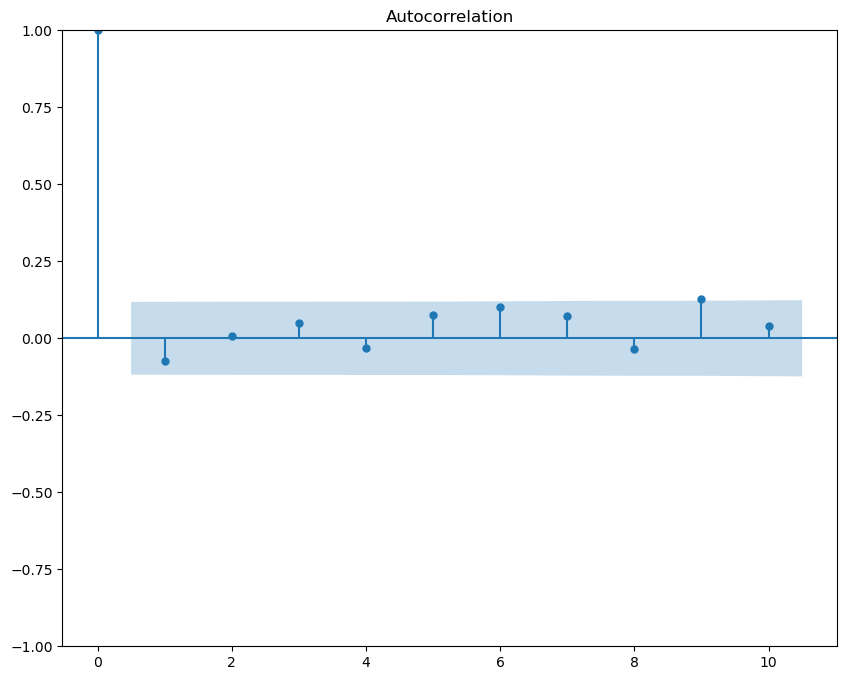

In [1842]:
plot_acf(df['30_diff'].dropna(),lags=10)
plt.plot()
# q=1

In [1843]:
model=SARIMAX(train['amount'],order=(1,1,3),seasonal_order=(1,1,3,30))

In [1844]:
model_fit=model.fit()
pred=model_fit.predict(start=test.index[0],end=test.index[-1])
df['SARIMAX Pred']=pred

In [1845]:
df.tail()

amount  first_diff     30_diff  ARIMA Pred  SARIMAX Pred
2023-01-17  2879833.0 -10451218.0 -13901869.0  16360197.1    10560175.1
2023-01-18 19488085.0  16608252.0  -5180652.0  16359809.9    18369676.8
2023-01-19 27046719.0   7558634.0  13359568.0  16360164.1     8353771.4
2023-01-20  2579056.0 -24467663.0  -5387061.0  16359840.1    20113895.4
2023-01-23  8309358.0   5730302.0   -429853.0  16360136.5    10327392.4

<AxesSubplot:ylabel='amount'>

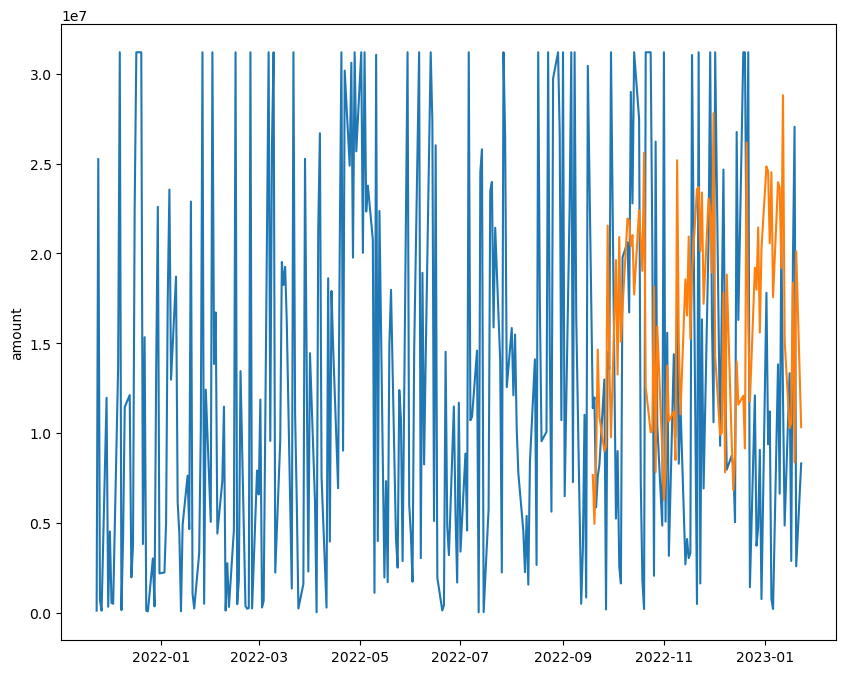

In [1846]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Pred')

In [1847]:
np.sqrt(mean_squared_error(test['amount'],prediction))

10365883.220088946

In [1848]:
df.tail()

amount  first_diff     30_diff  ARIMA Pred  SARIMAX Pred
2023-01-17  2879833.0 -10451218.0 -13901869.0  16360197.1    10560175.1
2023-01-18 19488085.0  16608252.0  -5180652.0  16359809.9    18369676.8
2023-01-19 27046719.0   7558634.0  13359568.0  16360164.1     8353771.4
2023-01-20  2579056.0 -24467663.0  -5387061.0  16359840.1    20113895.4
2023-01-23  8309358.0   5730302.0   -429853.0  16360136.5    10327392.4

In [1849]:
#How to interpret for Future Data
fut=(pd.DataFrame(pd.date_range(start='2023-01-24',end='2023-04-24',freq='B'),columns=['Dates']))
fut.set_index('Dates',inplace=True)
fut.head()

Empty DataFrame
Columns: []
Index: [2023-01-24 00:00:00, 2023-01-25 00:00:00, 2023-01-26 00:00:00, 2023-01-27 00:00:00, 2023-01-30 00:00:00]

In [1850]:
model_fit.predict(start=fut.index[0],end=fut.index[-1])

2023-01-24    7601505.1
2023-01-25    9588328.5
2023-01-26   14909794.1
2023-01-27   12370473.1
2023-01-30   12785285.1
                ...    
2023-04-18    9174806.3
2023-04-19   11150225.0
2023-04-20   16453029.7
2023-04-21   13942722.8
2023-04-24   14376648.5
Freq: B, Name: predicted_mean, Length: 65, dtype: float64

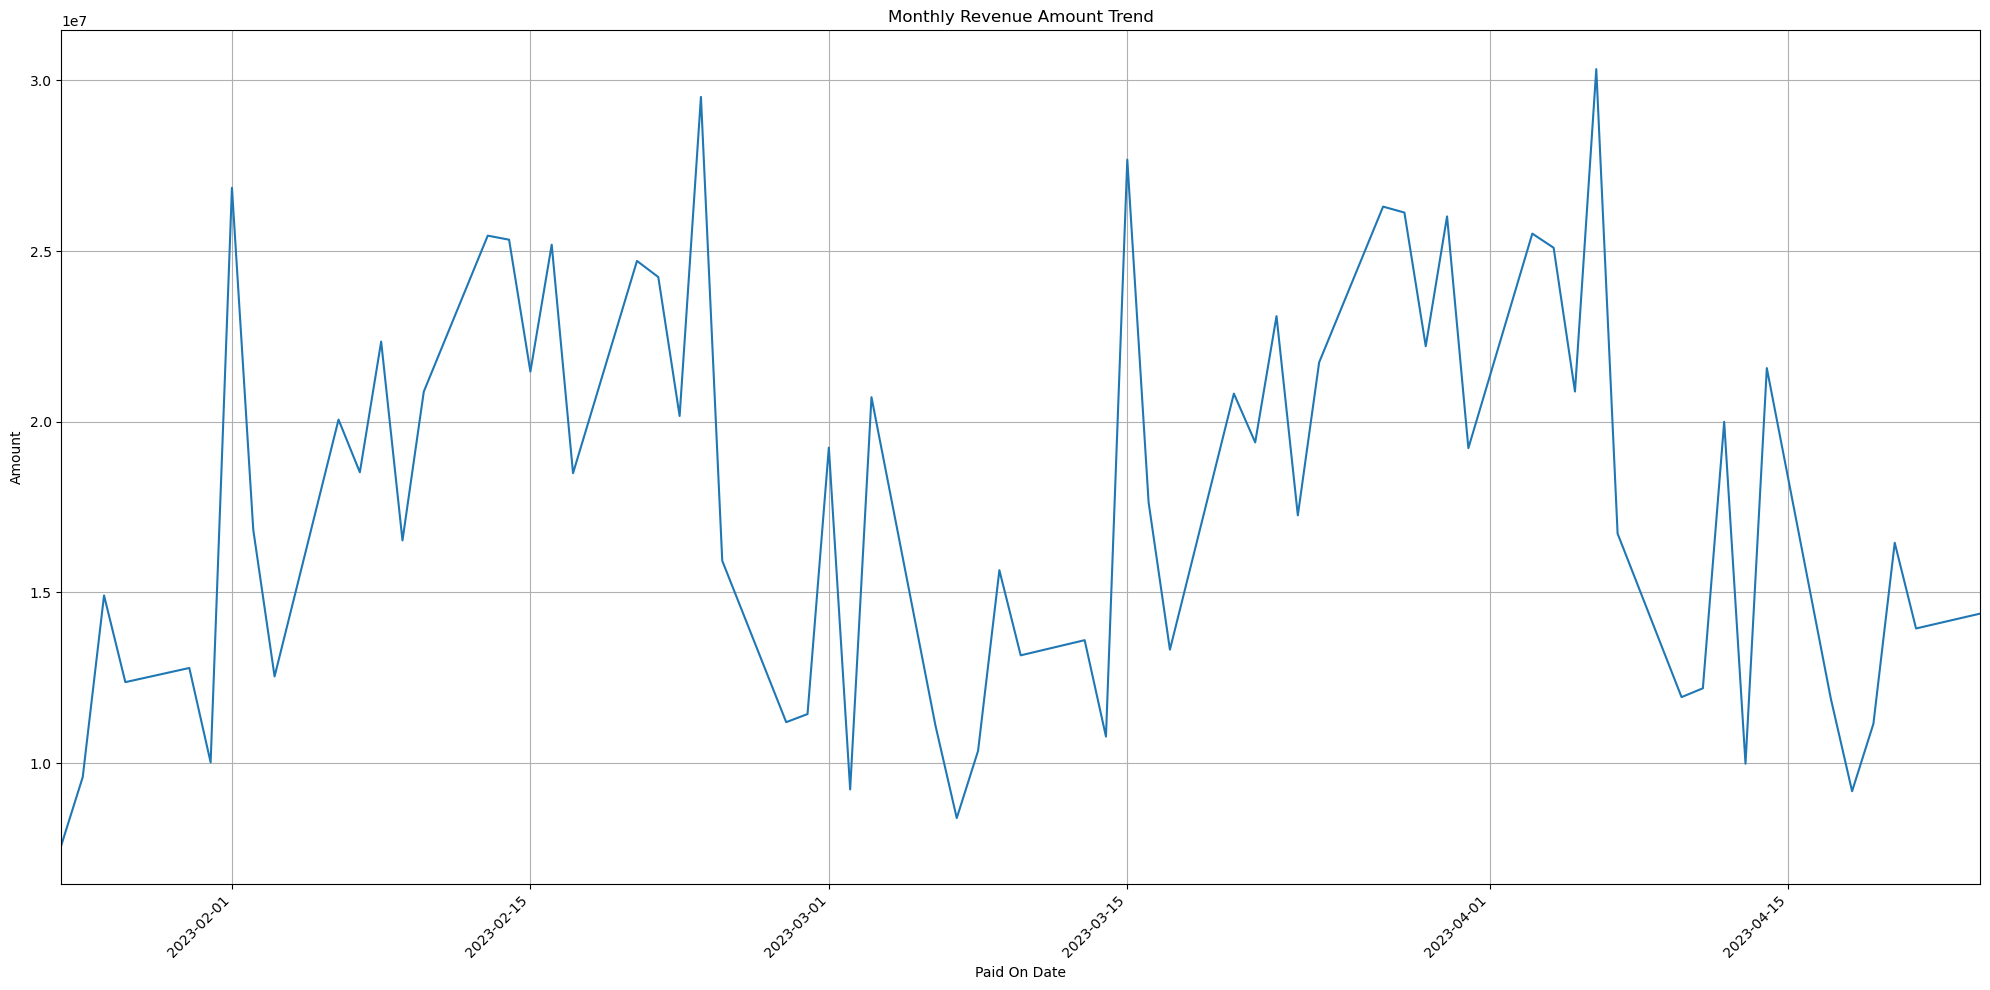

In [1851]:
plot(model_fit.predict(start=fut.index[0],end=fut.index[-1]))

<AxesSubplot:ylabel='amount'>

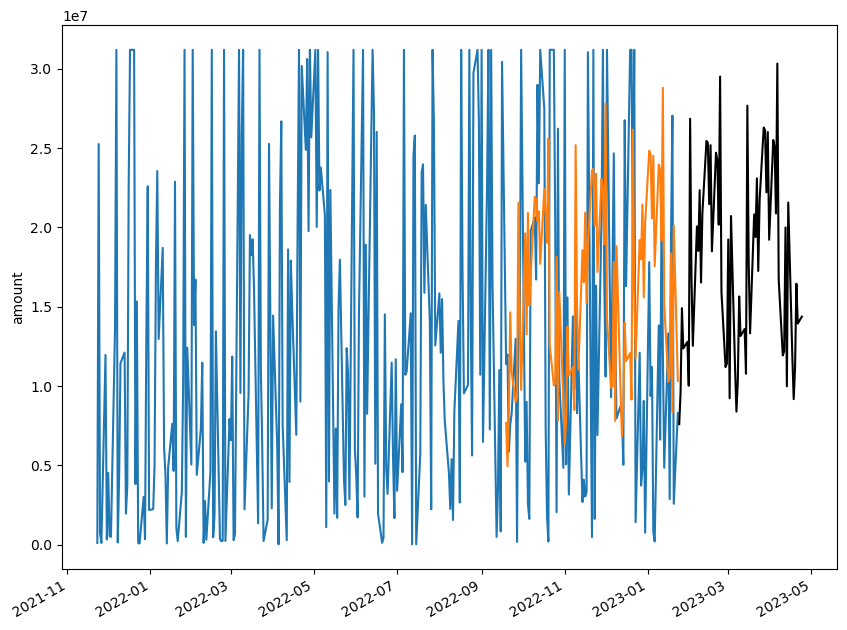

In [1852]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Pred')
model_fit.predict(start=fut.index[0],end=fut.index[-1]).plot(color='black')

In [1854]:
df.tail()

amount  first_diff     30_diff  ARIMA Pred  SARIMAX Pred
2023-01-17  2879833.0 -10451218.0 -13901869.0  16360197.1    10560175.1
2023-01-18 19488085.0  16608252.0  -5180652.0  16359809.9    18369676.8
2023-01-19 27046719.0   7558634.0  13359568.0  16360164.1     8353771.4
2023-01-20  2579056.0 -24467663.0  -5387061.0  16359840.1    20113895.4
2023-01-23  8309358.0   5730302.0   -429853.0  16360136.5    10327392.4